# Selección de cripto activos para una cartera de inversión

# Trabajo Práctico 4 - Aprendizaje Supervisado

# Introducción

Al comienzo del proyecto nuestro propósito era construir una cartera (o canasta) de cripto activos con el objetivo de maximizar los retornos a largo plazo y mantener una exposición al riesgo controlada. **¿A qué hacemos referencia cuando hablamos de portafolio?** Nos referimos a un conjunto de activos que adquirimos en un determinado momento y al pasar cierto tiempo decidimos verder algunos (todos o ninguno) para comprar otros. 

Partimos de un capital inicial, por ejemplo 100 USD (o 100 USDT) y destinamos cierto porcentaje del mismo para comprar determinados activos, por ejemplo, compramos 40 USDT de BTC, 30 de ETH y 10 de BNB, con lo cual destinamos un 40%, 30% y 10% de nuestro capital para la compra de estos activos. Pasado un determinado tiempo T (1 día, 1 semana, 1 mes, 3 meses, etc) decidimos rebalancear nuestra cartera, **¿a qué nos referimos con rebalancear una cartera?** simplemente es reajustar el peso (40%, 30% y 10% en el ejemplo anterior) de los diferentes activos que la componen, según la evolución del mercado y el perfil del inversor. Si consideramos que un activo ya no es rentable, podemos sacarlo de nuestro portafolio (venderlo) y comprar otro/otros. Y cuando otro periodo T haya transcurrido, repetimos esta misma operación. 

Nuestro objetivo será entonces aplicar algunas técnicas de aprendizaje automático más complejas que las trabajadas en el práctico anterior, para predecir el comportamiento de los activos y saber cuáles comprar en cada periodo.
 

**Conjunto de Entrenamiento y Test**

Para entrenar modelos de ML y seleccionar el más adecuado, debemos particionar los datos en conjuntos de entrenamiento y test (o entrenamiento, validación y test). Si bien la práctica más habitual es seleccionar estos conjuntos al azar, esta metodología no es conveniente cuando trabajamos con series de tiempo, ya que romper la estructura de los datos significa romper la autocorrelación, que es lo que da sentido al análisis. Frente a esto, una posibilidad es realizar la división de datos a partir del procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), otra es implementar lo que se conoce como [timeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).


**Variables Predictoras**

Los predictores son datos que consideramos relevantes para el comportamiento del mercado. En nuestro caso, trabajaremos con los indicadores técnicos de prácticos anteriores.

# ¡Actividades!

Como mencionamos en la introducción, nuestro objetivo será armar distintas carteras de inversión y compararlas utilizando diferentes métricas financieras. Utilizaremos una estrategia simple de inversión con la cual compararemos el resto de los portafolios.

**Portafolio base: equal-weighted portfolio**

Comenzamos con un capital inicial de 100 USDT y N activos disponibles para la compra. Al inicio de la inversión compraremos un 100/N % de nuestro capital en cada activo y dejaremos evolucionar el portafolio hasta que pase un cierto periodo T (un porcetage de 100/N % es equivalente a decir que el peso dado a cada activo será el mismo y es igual a 1/N). En el tiempo T, vamos a rebalancear nuestra cartera, es decir, posiblemente en lugar de contar con 100 USDT nuestra inversión haya generado ganancias y ahora sea de 130 USDT, entonces volvemos a asignarle un porcentaje de 100/N % a cada activo (esto llevará a verder parte de los activos y comprar más de otros). Esta será la forma de proceder a medida de se cumpla un nuevo periodo T.

Para más información sobre este tipo de portafolios pueden consultar en el siguiente [link](https://www.investopedia.com/terms/e/equalweight.asp#:~:text=Equal%20weight%20is%20a%20proportional,regardless%20of%20a%20company's%20size.&text=Equal%2Dweighted%20index%20funds%20tend,usually%20have%20higher%20trading%20costs.).

**Estrategias de inversión aplicando ML**

Nuestra tarea será armar portafolios utilizando los mismos N activos que tendrá el portafolio equal-weighted, solo que en lugar de tomar todos ellos, solo compraremos aquellos cuyo precio subirá según lo indiquen los algoritmos de ML. Si al tiempo T, de los N activos, solo M (con M < N) tendrán un aumento en su valor según nuestras predicciones, entonces durante ese periodo compraremos los M activos cuyos pesos en el portafolio será de 1/M. 

**Algunas métricas financieras para evaluar portafolios**

A continuación vemos algunas métricas sencillas para evaluar y comparar distintos portafolios de inversión. 

- [Retorno](https://www.investopedia.com/terms/t/totalreturn.asp)
- [Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp)
- [Volatilidad](https://www.investopedia.com/terms/v/volatility.asp)
- [Maximun Drawdown](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp)

## Parte I

Implementen modelos de clasificación para cada uno de los N activos considerados, con el objeto de predecir si el retorno superará un cierto umbral **R*** (con **R*** > 0), será inferior a **-R*** o se mantendrá en el rango entre **R*** y **-R***. 

Consideren:
- Desicion tree
- Randon Forest 
- XGBoost

**Comentarios**
- Tengan en cuenta que es conveniente trabajar con periodos de tiempo mayores a 1h, por ejemplo, 1 día o 1 semana. Una posibilidad sería rebalancear los portafolios cada 1 semana, pero hacer las predicciones con velas de 1 día, y mantener el activo siempre que el retorno sea mayor al umbral o en encuentre en el rango definido, si alguno de los activos se vende, entonces no vuelve a entrar a la cartera hasta el próximo rebalanceo.
- Por otro lado, en nuestro dataset contamos con periodos alcistas y bajistas del mercado, consideren portafolios para cubrir ambos momentos del mercado.
- En cada periodo T, si la predicción es que el retorno será superior a **R***, sumamos dicho activo a nuestra cartera. En el tiempo T+1, la predicción podría ser:
- el retorno es mayor a **R*** y en tal caso el activo se mantiene,
- el retorno es menor a **-R*** y no se lo considera al momento de rebalancear o,
- el retorno se mantiene entre **-R*** y **R***, en este caso ustedes pueden elegir mantenerlo en la cartera o venderlo.

## Parte II 

Comparen las métricas financieras de los distintos portafolios (incluyendo el equal-weighted) ¿qué pueden decir al respecto?
 

**¡Recuerden!** 

Nunca Modificar los Datos Crudos u Originales Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

# Fecha de entrega

- __Versión preliminar: 2/10__ 

- __Versión final: 2/10__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

#PARTE I

## Importaciones

In [ ]:
!pip install scikit-learn==1

     |████████████████████████████████| 23.1 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np

from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error  
from sklearn.metrics import median_absolute_error


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import xgboost
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

### TAlib

In [ ]:
#Instalación e importación de TALIB
#Hay que correrlo cada vez que se reinicia el entorno de ejecucion
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3


import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3729    0  3729    0     0  17344      0 --:--:-- --:--:-- --:--:-- 17263
100  503k  100  503k    0     0   573k      0 --:--:-- --:--:-- --:--:--  573k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3753    0  3753    0     0   5120      0 --:--:-- --:--:-- --:--:--  5113
100  406k  100  406k    0     0   288k      0  0:00:01  0:00:01 --:--:-- 1320k


### **TimeSeriesSplit**

Usamos Time Series Split por la facilidad y por la rapidez

In [ ]:
##Ejecutar la Primera Vez para actualizar la lib de sklearn, luego reiniciar para evitar error en train test split

#!pip install auto_ts --upgrade

In [ ]:
tscv = TimeSeriesSplit(n_splits=10,
                       test_size=20,          # Cuando tira el error hay que correr la primer celda que esta comentada, luego reiniciar y correr todo
                       #max_train_size=1000   # Esto es para limitar el tamaño del set de entrenamiento para reducir el tiempo de procesamiento, 
                                              # ya que se supone que dato smuy viejos no tendiran mucha implicancia en el presente
                                              # en el practico anterior vimos que aproximadamente despues de 700 valores anteriores no tenia mucho significado 
                       )

### **Funciones**

In [ ]:
def ADX(data: pd.DataFrame, period: int):
    df_aux = data.copy()
    alpha = 1/period

    # TR (True Range), calculo del rango verdadero
    df_aux['H-L'] = df_aux['high'].shift(1) - df_aux['low'].shift(1)
    df_aux['H-C'] = np.abs(df_aux['high'].shift(1) - df_aux['close'].shift(2))
    df_aux['L-C'] = np.abs(df_aux['low'].shift(1) - df_aux['close'].shift(2))
    df_aux['TR'] = df_aux[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df_aux['H-L'], df_aux['H-C'], df_aux['L-C']

    # ATR (Average True Range), promedio ponderado del TR
    df_aux['ATR'] = df_aux['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX (Indicador direccional)
    df_aux['H-pH'] = df_aux['high'].shift(1) - df_aux['high'].shift(2)
    df_aux['pL-L'] = df_aux['low'].shift(2) - df_aux['low'].shift(1)
    df_aux['+DX'] = np.where(
        (df_aux['H-pH'] > df_aux['pL-L']) & (df_aux['H-pH']>0),
        df_aux['H-pH'],
        0.0
    )
    df_aux['-DX'] = np.where(
        (df_aux['H-pH'] < df_aux['pL-L']) & (df_aux['pL-L']>0),
        df_aux['pL-L'],
        0.0
    )
    del df_aux['H-pH'], df_aux['pL-L']

    # +- DMI (Indice de movimiento direccional_ Directional Movement Index)
    df_aux['S+DM'] = df_aux['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df_aux['S-DM'] = df_aux['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df_aux['+DMI'] = (df_aux['S+DM']/df_aux['ATR'])*100
    df_aux['-DMI'] = (df_aux['S-DM']/df_aux['ATR'])*100
    del df_aux['S+DM'], df_aux['S-DM']

    # ADX (Average Directional Movement Index)
    df_aux['DX'] = (np.abs(df_aux['+DMI'] - df_aux['-DMI'])/(df_aux['+DMI'] + df_aux['-DMI']))*100
    df_aux['ADX'] =df_aux['DX'].ewm(alpha=alpha, adjust=False).mean()
    del df_aux['DX'], df_aux['TR'], df_aux['-DX'], df_aux['+DX'], df_aux['+DMI'], df_aux['-DMI']

    return df_aux

Seleccionamos los siguientes cripto activos para nuestra cartera (Linea base):


* NEOUSDT
* LTCUSDT
* ETHUSDT
* BTCUSDT
* BNBUSDT



## **Preproceso de Datos**

### **CARGA DATOS**

Procedemos a la carga de los datos de las 5 monedas que poseen datos más antiguos. Trabajamos sobre estas monedas para tener mayor cantidad de datos para entrenar los modelos y para calcular features

In [ ]:
###### CARGAR DESDE DRIVE ####
url = 'https://drive.google.com/file/d/1-KBDi_PaE1vwwArJynZQT7UngsYVSx27/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#print(path)
df_imp=pd.read_csv(path,sep=',', parse_dates=True,header=0,index_col=0,usecols=['cripto_activo','date','open','close','high','low','volume'])
df_imp.head(3)

,date,open,close,high,low,volume
cripto_activo,,,,,,
NEOUSDT,2018-01-01 00:00:00,74.854,72.565,75.072,71.050,4880.223
NEOUSDT,2018-01-01 01:00:00,72.788,72.680,74.000,72.152,5158.767
NEOUSDT,2018-01-01 02:00:00,72.720,74.293,74.679,72.502,819.395


In [ ]:
#Lista de Monedas
coins=list(df_imp.index.unique())

In [ ]:
#Formato de Fecha

df_imp.date=pd.to_datetime(df_imp.date) 
df_imp=df_imp.reset_index()

# Multi Index
df_imp.set_index(['cripto_activo','date'],inplace=True)
df_imp.head(3)

open   close    high     low    volume
cripto_activo date                                                         
NEOUSDT       2018-01-01 00:00:00  74.854  72.565  75.072  71.050  4880.223
              2018-01-01 01:00:00  72.788  72.680  74.000  72.152  5158.767
              2018-01-01 02:00:00  72.720  74.293  74.679  72.502   819.395

### **Cambiar Temporalidad de los datos**

Nuestros datos son de sesiones de 1 hora ,periodo demasiado pequeño para estar rebalanceando la cartera por lo que vamos a cambiar esta temporalidad a una mayor

In [ ]:
# Elección de Temporalidad
temp='D'

In [ ]:
# Selecciono todas las columnas entre open y volumen
df_t=df_imp.loc[:,'open':'volume'].copy()

# Diccionario con las funciones para agrupar en las nuevas ohlcv
ohlc_dict = {                                                                                                             
'open':'first',                                                                                                    
'high':'max',                                                                                                       
'low':'min',                                                                                                        
'close': 'last',                                                                                                    
'volume': 'sum'
}

In [ ]:
df_temp=pd.DataFrame()
for cripto in coins:
  df_Aux=pd.DataFrame()
  df_Aux=df_t.loc[cripto].resample(temp, closed='left', label='left').apply(ohlc_dict)
  df_Aux['cripto_activo']=cripto
  df_temp=pd.concat([df_temp,df_Aux])           
df_temp=df_temp.reset_index().set_index(['cripto_activo','date'])

In [ ]:
df_temp.head()

open     high     low    close       volume
cripto_activo date                                                      
NEOUSDT       2018-01-01   74.854   80.000  71.050   78.299   81399.8410
              2018-01-02   78.255   96.997  78.246   89.696  200642.6870
              2018-01-03   89.600  104.885  85.300  103.505  157777.6080
              2018-01-04  103.506  108.880  94.500   97.669  115115.6635
              2018-01-05   97.669  106.997  88.000   95.134  136754.8020

### **Recalculo de Features**

Calculamos nuevamente los Features con la nueva temporalidad, ya que en los trabajos anteriores estaban calculados con las sesiones de 1 hora

In [ ]:
# Medias Moviles 
periodos=[3,7,14]
for n in periodos:
  for cripto in coins:
    df_temp.loc[cripto,f'mean_m{n}']=df_temp.loc[cripto,'close'].shift(1).rolling(n).mean().values

In [ ]:
for cripto in coins:
  # Rendimientos
  df_temp.loc[cripto,'r_sim']=df_temp.loc[cripto,'close'].shift(1).pct_change().values
  df_temp.loc[cripto,'r_log']=np.log(df_temp.loc[cripto,'close']/df_temp.loc[cripto,'close'].shift(1)).shift(1).values

  # RSI
  df_temp.loc[cripto,'RSI_14'] = talib.RSI(df_temp.loc[cripto]['close'].shift(1).values, timeperiod=14)
  df_temp.loc[cripto,'RSI_7'] = talib.RSI(df_temp.loc[cripto]['close'].shift(1).values, timeperiod=7)
 
  # MACD
  macd, signal, hist = talib.MACD(df_temp.loc[cripto]['close'].shift(1).values, fastperiod=12, slowperiod=26, signalperiod=9)
  df_temp.loc[cripto,'MACD'] = macd
  df_temp.loc[cripto,'signal'] = signal
  df_temp.loc[cripto,'hist'] = hist

  # ADX ATR
  df_temp.loc[cripto,'ADX']=ADX(df_temp.loc[cripto], period=14)['ADX'].shift(1).values
  df_temp.loc[cripto,'ATR']=ADX(df_temp.loc[cripto], period=14)['ATR'].shift(1).values

  # MFI
  df_temp.loc[cripto,'MFI'] = talib.MFI(df_temp.loc[cripto,'high'].shift(1).values, 
                                     df_temp.loc[cripto,'low'].shift(1).values, 
                                     df_temp.loc[cripto,'close'].shift(1).values , 
                                     df_temp.loc[cripto,'volume'].shift(1).values, 
                                     timeperiod=14)
  # OBV
  df_temp.loc[cripto,'OBV'] = talib.OBV( df_temp.loc[cripto,'close'].shift(1).values , 
                                     df_temp.loc[cripto,'volume'].shift(1).values)



  #STD_U STD_D
  df_temp.loc[cripto,'Std_U'] =(df_temp.loc[cripto,'high']-df_temp.loc[cripto,'open']).shift(1).values
  df_temp.loc[cripto,'Std_D'] = (df_temp.loc[cripto,'open']-df_temp.loc[cripto,'low']).shift(1).values

  #Correlacion
  df_temp.loc[cripto,'corr_3'] = df_temp.loc[cripto,'close'].shift(1).rolling(window=10).corr(df_temp['mean_m3'].shift(1))

  #OD y OL
  df_temp.loc[cripto,'OD'] = df_temp.loc[cripto]['open'].values-df_temp.loc[cripto]['open'].shift(1).values
  df_temp.loc[cripto,'OL'] = df_temp.loc[cripto]['open'].values-df_temp.loc[cripto]['close'].shift(1).values

  #Close y volumen before
  df_temp.loc[cripto,'close_before']=df_temp.loc[cripto,'close'].shift(1).values
  df_temp.loc[cripto,'volume_before']=df_temp.loc[cripto,'volume'].shift(1).values

  #Diferencia entre close y media movil 7
  df_temp.loc[cripto,'dcma7']=df_temp.loc[cripto,'close'].shift(1).rolling(7).mean().values-df_temp.loc[cripto,'close'].shift(1).values

  #Maximo en una ventana de 7 periodos
  df_temp.loc[cripto,'max_puntual']=np.where((df_temp.loc[cripto,'r_log']<0).values&(df_temp.loc[cripto,'r_log'].shift().values>0),df_temp.loc[cripto,'close'].values,0)
  df_temp.loc[cripto,'max_rol_7']=df_temp.loc[cripto,'max_puntual'].rolling(7).max().values


  #Distancia a al valor maximo de ventana 
  df_temp.loc[cripto,'d_max_rol_7']=df_temp.loc[cripto,'close_before'].values-df_temp.loc[cripto,'max_rol_7'].values

  #Volatilidad Semana 
  df_temp.loc[cripto,'vol_7']=df_temp.loc[cripto,'r_log'].rolling(7).std().shift(1).values

  #Rendimiento esperado Semana
  df_temp.loc[cripto,'r_log_m7']=df_temp.loc[cripto,'r_log'].shift(1).rolling(7).mean().values
  
  #Volumen esperado Semana
  df_temp.loc[cripto,'v_m7']=df_temp.loc[cripto,'volume'].shift(1).rolling(7).mean().values



  #Columna objetivo y
  df_temp.loc[cripto,'r_log_target']=np.log(df_temp.loc[cripto,'close']/df_temp.loc[cripto,'close'].shift(1)).values

**Variables Categoricas nuevas**

In [ ]:
#Cruce de MACD con Signal
df_temp['MACDSIGgtMACD'] = np.where(df_temp['signal'] > df_temp['MACD'], 1, -1)

#Cruce de media movil con el precio
df_temp['ClgtS7'] = np.where(df_temp['close'].shift(1) > df_temp['mean_m7'], 1, -1)

#Cruce entre medias moviles
df_temp['S7gtS14'] = np.where(df_temp['mean_m7'] > df_temp['mean_m14'], 1, -1)

#MFI Categórico
df_temp['Cat_MFI']=np.where(df_temp['MFI'] > 80, -1, np.where(df_temp['MFI'] < 20, 1,0))

#RSI Categórico
df_temp['Cat_RSI7']=np.where(df_temp['RSI_7'] > 80, -1, np.where(df_temp['RSI_7'] < 20, 1,0))
df_temp['Cat_RSI14']=np.where(df_temp['RSI_14'] > 80, -1, np.where(df_temp['RSI_14'] < 20, 1,0))

In [ ]:
df_temp.iloc[50:55]

open     high  ...  Cat_RSI7  Cat_RSI14
cripto_activo date                          ...                     
NEOUSDT       2018-02-20  136.391  140.849  ...         0          0
              2018-02-21  124.661  128.551  ...         0          0
              2018-02-22  117.690  125.850  ...         0          0
              2018-02-23  111.478  122.600  ...         0          0
              2018-02-24  118.519  123.999  ...         0          0

[5 rows x 40 columns]

**Limpieza de NAN**

Al crear los atributos se agregan muchos valores NAN, ya que un atributo que necesita 10 periodos para su calculo genera 10 periodos de valores nulos

In [ ]:
df_temp.dropna(inplace=True)

In [ ]:
df_temp.head()

open        high  ...  Cat_RSI7  Cat_RSI14
cripto_activo date                             ...                     
NEOUSDT       2018-02-04  124.601  125.000000  ...         0          0
              2018-02-05  107.025  109.850000  ...         0          0
              2018-02-06   82.137  110.210000  ...         0          0
              2018-02-07  103.535  119.500000  ...         0          0
              2018-02-08  102.003  112.045455  ...         0          0

[5 rows x 40 columns]

### **Selección Umbral R**

Se porcede a legir un rango de umbral para tomar la decision de comprar o vender activos de nuestra cartera, de acuerdo al conocimiento de domminio (LIOREN) seleccionamos un umbral de rendimiento del 2 %.

In [ ]:
umbral_r= 0.01

### **Proceso de Anotación / Generación de etiquetas**

Se va a generar un etiquetado de la sesion en función del rendimiento obtenido y el umbral.

El etiquetado de los datos será:

*   Menor a -R (Valor a usar => 0)
*   Entre -R y R (Valor a usar => 0)
*   Mayor R (Valor a usar => 1)

In [ ]:
df_temp.head()

open        high  ...  Cat_RSI7  Cat_RSI14
cripto_activo date                             ...                     
NEOUSDT       2018-02-04  124.601  125.000000  ...         0          0
              2018-02-05  107.025  109.850000  ...         0          0
              2018-02-06   82.137  110.210000  ...         0          0
              2018-02-07  103.535  119.500000  ...         0          0
              2018-02-08  102.003  112.045455  ...         0          0

[5 rows x 40 columns]

In [ ]:
df_clasf=df_temp.copy() #Copia del dataframe para preservarlo

for cripto in coins: 
  #Columna objetivo y, seria la etiqueta de la sesion actual 
  df_clasf.loc[cripto,'r_log_clasif']=np.where(df_clasf.loc[cripto,'r_log_target'] > umbral_r, 1, np.where(df_clasf.loc[cripto,'r_log_target'] < -umbral_r, -1,0))

In [ ]:
df_clasf.head()

open        high  ...  Cat_RSI14  r_log_clasif
cripto_activo date                             ...                         
NEOUSDT       2018-02-04  124.601  125.000000  ...          0          -1.0
              2018-02-05  107.025  109.850000  ...          0          -1.0
              2018-02-06   82.137  110.210000  ...          0           1.0
              2018-02-07  103.535  119.500000  ...          0          -1.0
              2018-02-08  102.003  112.045455  ...          0           1.0

[5 rows x 41 columns]

Crear nuevo atributo con como fue la sesión anterior

In [ ]:
for cripto in coins: 
  #Columna objetivo y, seria rendimiento logaritmico de la sesion actual  
  df_clasf.loc[cripto,'r_log_clasif_ant']=df_clasf.loc[cripto,'r_log_clasif'].shift().values

In [ ]:
df_clasf.dropna(inplace=True)

In [ ]:
df_clasf.head()

open  ...  r_log_clasif_ant
cripto_activo date                    ...                  
NEOUSDT       2018-02-05  107.025000  ...              -1.0
              2018-02-06   82.137000  ...              -1.0
              2018-02-07  103.535000  ...               1.0
              2018-02-08  102.003000  ...              -1.0
              2018-02-09  107.324455  ...               1.0

[5 rows x 42 columns]

### **Separar en X e Y**

In [ ]:
#Estudiando correlaciones entre fetures de un activo
abs(df_clasf.loc['BTCUSDT']['2018':'2020'].corr()['r_log_clasif']).sort_values(ascending=False)[2:]

close               0.104457
r_sim               0.103830
r_log               0.103796
OD                  0.086386
low                 0.076588
r_log_clasif_ant    0.074424
high                0.071794
Std_D               0.070467
OBV                 0.069495
max_puntual         0.065117
max_rol_7           0.057444
RSI_14              0.050986
d_max_rol_7         0.045853
signal              0.042166
v_m7                0.040948
MACD                0.040782
r_log_m7            0.040604
mean_m3             0.038162
ADX                 0.037858
mean_m7             0.036710
mean_m14            0.036431
OL                  0.035905
RSI_7               0.034476
close_before        0.034240
open                0.034128
volume_before       0.033360
MFI                 0.029835
Cat_RSI7            0.027514
Cat_MFI             0.026873
volume              0.026097
ClgtS7              0.020225
S7gtS14             0.017595
Std_U               0.014141
ATR                 0.014112
vol_7         

In [ ]:
y_columns_clas=['r_log_clasif']

#Columnas de Atributos a usar

x_columns_clas=[		
           'r_log',	
           'r_log_clasif_ant',
           'mean_m3',	'mean_m7'	,'mean_m14',	
           'RSI_14'	,#'RSI_7',
           'MACD',	'signal',#hist,
           'ADX'	,#'ATR',	'vol_7',	
           	'Std_D'	,	'OD'	,'OL',	'OBV',#'MFI','corr_3','Std_U',
           #'MACDSIGgtMACD','ClgtS7','Cat_MFI','Cat_RSI7',#'Cat_RSI14','S7gtS14',
           'd_max_rol_7',
           'dcma7',
           'r_log_m7',
           'v_m7',
           'close_before','volume_before',
           ]


### **Separar Subconjunto de Entrenamiento, Validacion del subconjunto de evaluacion**

In [ ]:
df_clasf.head()

open  ...  r_log_clasif_ant
cripto_activo date                    ...                  
NEOUSDT       2018-02-05  107.025000  ...              -1.0
              2018-02-06   82.137000  ...              -1.0
              2018-02-07  103.535000  ...               1.0
              2018-02-08  102.003000  ...              -1.0
              2018-02-09  107.324455  ...               1.0

[5 rows x 42 columns]

In [ ]:
#Filtros para separar train_ validation de Test

filtro_train_validation=slice('12-2020')
filtro_test=slice('01-2021','05-2021')

In [ ]:
ltotal=len(df_temp.loc[cripto])
lval=len(df_temp.loc[cripto][filtro_train_validation])
ltes=len(df_temp.loc[cripto][filtro_test])

In [ ]:
print(ltotal,lval,ltes)

1198 1062 136


In [ ]:
ltes/ltotal

0.11352253756260434

In [ ]:
cripto

'BNBUSDT'

In [ ]:
#Creacion de Data Frame Train y Test para la cripto en cuestion
X_train=df_clasf.loc[cripto,x_columns_clas][filtro_train_validation]
y_train=df_clasf.loc[cripto,y_columns_clas][filtro_train_validation]
X_test=df_clasf.loc[cripto,x_columns_clas][filtro_test]
y_test=df_clasf.loc[cripto,y_columns_clas][filtro_test]

In [ ]:
X_test.head()

,r_log,r_log_clasif_ant,mean_m3,mean_m7,mean_m14,RSI_14,MACD,signal,ADX,Std_D,OD,OL,OBV,d_max_rol_7,dcma7,r_log_m7,v_m7,close_before,volume_before
date,,,,,,,,,,,,,,,,,,,
2021-01-01,-0.021109,-1.0,38.193767,35.863143,34.207186,64.755252,1.996106,1.391182,29.581354,1.6401,-0.7962,0.0008,4.743184e+08,0.0000,-1.495657,0.028823,3.471575e+06,37.3588,1887715.835
2021-01-02,0.011111,1.0,37.763600,36.516943,34.692043,65.692914,2.074377,1.527821,31.547490,0.4041,0.4041,-0.0125,4.767543e+08,0.4174,-1.259257,0.019950,3.437068e+06,37.7762,2435989.127
2021-01-03,0.012022,1.0,37.789367,37.173657,35.043214,66.736140,2.148509,1.651959,33.556087,0.9637,0.4694,0.0000,4.797724e+08,0.8743,-1.059443,0.018449,3.522656e+06,38.2331,3018062.206
2021-01-04,0.076131,1.0,39.088933,38.257014,35.539121,72.662140,2.423368,1.806240,35.270340,0.4701,3.0229,-0.0015,4.846760e+08,3.8987,-3.000486,0.018300,3.687764e+06,41.2575,4903626.697
2021-01-05,-0.003015,0.0,40.207967,38.997343,36.187929,72.094130,2.601188,1.965230,37.484945,3.2360,-0.1260,-0.0033,4.793698e+08,-0.6886,-2.135957,0.029015,3.856973e+06,41.1333,5306248.166


## **Metricas**

Diferencia entre Precision, Recall, f1 y Accuracy.

* **Precision**: De todos los que predijo positivos, cuantos realmente eran positivos.

* **Recall**: De todos los positivos, cuantos realmente predijo positivo 

* **Accuracy**: Sobre el total cuantas predicciones acerto.

* **F1**:  2 * (precision * recall) / (precision + recall)

**Accuracy** se usa cuando verdaderos positivos y verdaderos negativos son más importantes  mientras que **F1-score** se usa cuando los falsos negativos y los falsos positivos son cruciales

En nuestro caso tendriamos la siguiente situación, ante un falso positivo en la prediccion de rendimientos crecientes, invertiriamos en una moneda cuyo precio bajaria. Ante un falso negativo, perderiamos la posibilidad de ganar dinero.

Tal vez lo más critico serían los falsos positivos, en el peor de los casos perderiamos todo el capital, ante falsos negativos mantendriamos el capital.

Por lo que la **precision** deberia prevalecer ante el **recall** en el caso de las clasificaciones de tendencia positiva y a la inversa en las de tendencia negativa.

Siendo lo ideal ver **Accuracy** o **F1-score**, ya que nos permitiria, bajar el riesgo de perder el capital y aumentar las posibilidades de acrecentarlo.

Accuracy se usa más cuando las clases estan balanceadas y F1 cuando no lo estan.


## **Modelos**

Definimos una variable llamada "**tipo_modelado**" donde el valor "*rapido*" nos permite establecer una cota a las combinaciones de hiperparámetros a probar utilizando **sklearn.model_selection.RandomizedSearchCV** con el parametro **n_iter <= 100**. 

Para cualquier otro valor se probarán todas las combinaciones posibles utilizando **sklearn.model_selection.GridSearchCV**.



In [ ]:
tipo_modelado='rapido' # o exhaustivo

####**Función para modelar**

In [ ]:
resultados_modelos=dict() #Diccionario para guardar resultados de los modelos para luego comparar

In [ ]:
def modelar(modelo,cv_t,parametros,t_modelado:'rapido',iter_max:100):
  #Cantidad de Combinaciones
  comb=1
  for key,values in parametros.items():
    comb*=len(values)
  print (f'{comb} combinaciones')
  #Iteraciones Maxima
  if comb<=iter_max:
    n_itera=comb
  else:
    n_itera=int(min(comb/10,iter_max))

  pipe = Pipeline([
        ('scale', RobustScaler()),
        ('reduce_dims', PCA(n_components=14)),
        ('estimator', modelo)])
  
  if t_modelado=='rapido':
    cv_clas = RandomizedSearchCV(pipe, parametros, scoring='accuracy', cv=cv_t,n_iter=n_itera)
  else:
    cv_clas = GridSearchCV(pipe, parametros, scoring='accuracy', cv=cv_t)

  cv_clas.fit(X_train,y_train.values.ravel())

  y_train_pred = cv_clas.predict(X_train)
  y_test_pred = cv_clas.predict(X_test)


  results = cv_clas.cv_results_
  params = results['params']
  mean = results['mean_test_score']
  std = results['std_test_score']
  rank = results['rank_test_score']
  df_result=pd.DataFrame(params)
  df_result['Accuracy promedio']=mean
  df_result['Desvio']=std
  df_result['Ranking']=rank
  df_result=df_result.sort_values(by='Ranking')

  best_estimator=cv_clas.best_estimator_

  acc_train=round(accuracy_score(y_train, y_train_pred),3)
  acc_test=round(accuracy_score(y_test, y_test_pred),3)

  print('Accuracy Train:',acc_train)
  print('Accuracy Test:', acc_test)
  print(classification_report(y_train,y_train_pred, zero_division=1))
  print(classification_report(y_test,y_test_pred, zero_division=1))

  dict_report_train=classification_report(y_train,y_train_pred, zero_division=1,output_dict=True)
  dict_report_test=classification_report(y_test,y_test_pred, zero_division=1,output_dict=True)
  dicc={'best_estimator':best_estimator,'resultado':df_result,'reporte_train':dict_report_train,'reporte_test':dict_report_test,'y_train_pred':y_train_pred,'y_test_pred':y_test_pred}
  resultados_modelos[modelo]={'parametros':parametros,
                              'best_estimator':best_estimator,
                              
                              'accuracy_train':dict_report_train['accuracy'],
                              'accuracy_test':dict_report_test['accuracy'],

                              'recall_train':dict_report_train['macro avg']['recall'],
                              'recall_test':dict_report_test['macro avg']['recall'],

                              'precision_test':dict_report_test['macro avg']['precision'],
                              'precision_train':dict_report_train['macro avg']['precision'],
                              
                              'f1_test':dict_report_test['macro avg']['f1-score'],
                              'f1_train':dict_report_train['macro avg']['f1-score'],
                              }
  return dicc

#### **Baseline**

El modelo que consideraremos como baseline toma como predicción el valor de la sesión anterior.

In [ ]:
y_train_pred_baseline = y_train.shift().fillna(0)
y_test_pred_baseline = y_test.shift().fillna(0)

##### **Resultado**

In [ ]:
print(classification_report(y_train,y_train_pred_baseline, zero_division=1))
print(classification_report(y_test,y_test_pred_baseline, zero_division=1))

              precision    recall  f1-score   support

        -1.0       0.31      0.31      0.31       385
         0.0       0.31      0.31      0.31       254
         1.0       0.38      0.38      0.38       422

    accuracy                           0.34      1061
   macro avg       0.33      0.33      0.33      1061
weighted avg       0.34      0.34      0.34      1061

              precision    recall  f1-score   support

        -1.0       0.23      0.23      0.23        48
         0.0       0.18      0.19      0.19        21
         1.0       0.39      0.39      0.39        67

    accuracy                           0.30       136
   macro avg       0.27      0.27      0.27       136
weighted avg       0.30      0.30      0.30       136



In [ ]:
baseline_dict_report_train=classification_report(y_train,y_train_pred_baseline, zero_division=1, output_dict=True)

In [ ]:
baseline_dict_report_test=classification_report(y_test,y_test_pred_baseline, zero_division=1, output_dict=True)

In [ ]:
  resultados_modelos['baseline']={'parametros':'baseline',
                              'best_estimator':'baseline',
                              
                              'accuracy_train':baseline_dict_report_train['accuracy'],
                              'accuracy_test':baseline_dict_report_test['accuracy'],

                              'recall_train':baseline_dict_report_train['macro avg']['recall'],
                              'recall_test':baseline_dict_report_test['macro avg']['recall'],

                              'precision_test':baseline_dict_report_test['macro avg']['precision'],
                              'precision_train':baseline_dict_report_train['macro avg']['precision'],
                              
                              'f1_test':baseline_dict_report_test['macro avg']['f1-score'],
                              'f1_train':baseline_dict_report_train['macro avg']['f1-score'],
                              }

####**DecisionTreeClassifier**

In [ ]:
#Grilla de hiperparametros:
param_grid_tree = {
    'estimator__criterion': [
                             'gini',
                             'entropy',
                             ],
    'estimator__splitter': [
                            'best', 
                            'random',
                            ],
    'estimator__max_depth': list(range(3,20)),
    'estimator__min_samples_leaf':list(range(3,17)),
}


In [ ]:
arbol=modelar(DecisionTreeClassifier(random_state = 0),tscv.split(X_train),param_grid_tree,'rapido',100)
arbol['resultado'].head(10)

952 combinaciones
Accuracy Train: 0.616
Accuracy Test: 0.537
              precision    recall  f1-score   support

        -1.0       0.69      0.58      0.63       385
         0.0       0.51      0.53      0.52       254
         1.0       0.63      0.70      0.66       422

    accuracy                           0.62      1061
   macro avg       0.61      0.60      0.60      1061
weighted avg       0.62      0.62      0.62      1061

              precision    recall  f1-score   support

        -1.0       0.48      0.71      0.57        48
         0.0       0.40      0.10      0.15        21
         1.0       0.62      0.55      0.58        67

    accuracy                           0.54       136
   macro avg       0.50      0.45      0.44       136
weighted avg       0.53      0.54      0.51       136



,estimator__splitter,estimator__min_samples_leaf,estimator__max_depth,estimator__criterion,Accuracy promedio,Desvio,Ranking
76,best,9,7,gini,0.440,0.147986,1
60,best,6,7,gini,0.440,0.159374,2
44,best,10,4,gini,0.440,0.135647,2
22,best,4,14,gini,0.425,0.084410,4
1,random,15,17,entropy,0.425,0.116726,4
37,random,15,19,entropy,0.425,0.116726,4
5,best,3,6,gini,0.425,0.152069,4
19,random,15,6,gini,0.425,0.046098,4
34,best,6,6,gini,0.425,0.156924,9
35,random,15,11,entropy,0.420,0.116619,10


Mejora respecto al baseline, se ve que tiene dificultades con la cetegoria de 0, pero se ve que tiene buena presicion en la etiqueta '0' y buen recall en la etiqueta '-1', por lo que es prometedor para ampliar ganancias y reducir perdidas

#### **Randon Forest**


In [ ]:
search_params = {
    'estimator__n_estimators': list(range(400,1060,60)),
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__min_samples_leaf': list(range(4,17)),
    'estimator__max_depth': list(range(3,20)),
    'estimator__max_features':['sqrt',0.5],
    'estimator__bootstrap' : [True, False],
}

In [ ]:
rforest=modelar(ensemble.RandomForestClassifier(random_state=2),tscv.split(X_train),search_params,'rapido',50)
rforest['resultado'].head(10)

19448 combinaciones
Accuracy Train: 0.741
Accuracy Test: 0.5
              precision    recall  f1-score   support

        -1.0       0.76      0.84      0.80       385
         0.0       0.73      0.34      0.47       254
         1.0       0.73      0.89      0.80       422

    accuracy                           0.74      1061
   macro avg       0.74      0.69      0.69      1061
weighted avg       0.74      0.74      0.72      1061

              precision    recall  f1-score   support

        -1.0       0.44      0.60      0.51        48
         0.0       1.00      0.00      0.00        21
         1.0       0.56      0.58      0.57        67

    accuracy                           0.50       136
   macro avg       0.67      0.40      0.36       136
weighted avg       0.58      0.50      0.46       136



,estimator__n_estimators,estimator__min_samples_leaf,estimator__max_features,estimator__max_depth,estimator__criterion,estimator__bootstrap,Accuracy promedio,Desvio,Ranking
8,760,6,sqrt,6,gini,False,0.455,0.112805,1
34,760,12,0.5,3,gini,False,0.445,0.112805,2
37,460,4,sqrt,5,entropy,False,0.440,0.133791,3
36,760,14,sqrt,4,gini,False,0.440,0.124097,3
16,460,6,0.5,4,gini,False,0.435,0.145000,5
48,580,5,sqrt,3,gini,False,0.435,0.155000,5
13,940,14,0.5,3,gini,False,0.435,0.111915,5
31,400,12,sqrt,3,entropy,True,0.430,0.156844,8
25,400,16,sqrt,16,gini,False,0.425,0.161632,9
21,700,10,sqrt,3,entropy,False,0.425,0.150416,10


Mejora respecto al baseline


#### **GradientBoostingClassifier**

In [ ]:
search_params = {
    'estimator__loss':['deviance'],
    #'estimator__learning_rate': [0.05, 0.1,0.15],
    'estimator__criterion':['absolute_error'],
    'estimator__n_estimators': [10,15],
    #'estimator__min_samples_leaf': list(range(1,5)),
    'estimator__max_depth': list(range(3,15)),
    'estimator__max_features':['sqrt',0.5,0.9],
}

In [ ]:
GBC=modelar(ensemble.GradientBoostingClassifier(random_state=2),tscv.split(X_train),search_params,'rapido',50)
GBC['resultado'].head(10)

72 combinaciones


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1286: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1286: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1286: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/p

Accuracy Train: 0.65
Accuracy Test: 0.353
              precision    recall  f1-score   support

        -1.0       0.73      0.70      0.71       385
         0.0       1.00      0.17      0.28       254
         1.0       0.58      0.90      0.71       422

    accuracy                           0.65      1061
   macro avg       0.77      0.59      0.57      1061
weighted avg       0.74      0.65      0.61      1061

              precision    recall  f1-score   support

        -1.0       0.36      0.19      0.25        48
         0.0       0.16      0.29      0.20        21
         1.0       0.45      0.49      0.47        67

    accuracy                           0.35       136
   macro avg       0.32      0.32      0.31       136
weighted avg       0.37      0.35      0.35       136



,estimator__n_estimators,estimator__max_features,estimator__max_depth,estimator__loss,estimator__criterion,Accuracy promedio,Desvio,Ranking
3,10,0.5,6,deviance,absolute_error,0.430,0.158430,1
5,10,0.5,4,deviance,absolute_error,0.410,0.130000,2
6,10,sqrt,6,deviance,absolute_error,0.410,0.128062,2
0,10,0.9,4,deviance,absolute_error,0.395,0.127377,4
2,15,0.5,4,deviance,absolute_error,0.375,0.110114,5
4,10,0.9,8,deviance,absolute_error,0.355,0.115000,6
1,10,0.5,8,deviance,absolute_error,0.320,0.128841,7


Mejora respecto al baseline en el conjunto de entrenamiento, pero no en el de test. Llega 96% de accuracy, estaría overfiteando



#### **XGBoost**
https://xgboost.readthedocs.io/en/latest/parameter.html

https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97

In [ ]:
search_params = {
    'estimator__booster':['gbtree', 'gblinear','dart'],
    
    'estimator__alpha':[0, 1],
    'estimator__eta': [0.1, 0.3,1],

    #'estimator__min_samples_leaf': list(range(1,5)),
    'estimator__max_depth': list(range(3,20)),
}

In [ ]:
XGBC=modelar(XGBClassifier(random_state=0),tscv.split(X_train),search_params,'rapido',50)
XGBC['resultado'].head(10)

306 combinaciones
Accuracy Train: 0.429
Accuracy Test: 0.493
              precision    recall  f1-score   support

        -1.0       0.47      0.31      0.38       385
         0.0       1.00      0.00      0.00       254
         1.0       0.42      0.79      0.54       422

    accuracy                           0.43      1061
   macro avg       0.63      0.37      0.31      1061
weighted avg       0.58      0.43      0.35      1061

              precision    recall  f1-score   support

        -1.0       0.45      0.58      0.51        48
         0.0       0.07      0.05      0.06        21
         1.0       0.63      0.57      0.60        67

    accuracy                           0.49       136
   macro avg       0.39      0.40      0.39       136
weighted avg       0.48      0.49      0.48       136



,estimator__max_depth,estimator__eta,estimator__booster,estimator__alpha,Accuracy promedio,Desvio,Ranking
14,11,0.1,gblinear,1,0.405,0.103562,1
18,10,0.3,gblinear,0,0.405,0.103562,1
24,5,0.3,gblinear,0,0.405,0.103562,1
25,9,0.3,gblinear,0,0.405,0.103562,1
13,3,0.3,gblinear,0,0.405,0.103562,1
11,12,1.0,gblinear,1,0.405,0.103562,1
9,19,0.3,gblinear,0,0.405,0.103562,1
23,11,0.3,gblinear,0,0.405,0.103562,1
26,7,0.3,gblinear,0,0.405,0.103562,1
4,9,0.1,gblinear,0,0.405,0.103562,1


Se puede ver que existe overfitting

#### **Support Vector Classification**

In [ ]:
#Grilla de hiperparametros:
search_params = {'estimator__C': [0.1,1,10,100,1000 ], 
              'estimator__gamma': [0.1,1,10],
              'estimator__kernel': ['rbf',
                         #'poly',
                         'sigmoid'
                         ]}


In [ ]:
svc=modelar(SVC(random_state=0),tscv.split(X_train),search_params,'rapido',50)
svc['resultado'].head(10)

30 combinaciones
Accuracy Train: 0.998
Accuracy Test: 0.493
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       385
         0.0       0.99      1.00      1.00       254
         1.0       1.00      1.00      1.00       422

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00        48
         0.0       1.00      0.00      0.00        21
         1.0       0.49      1.00      0.66        67

    accuracy                           0.49       136
   macro avg       0.83      0.33      0.22       136
weighted avg       0.75      0.49      0.33       136



,estimator__kernel,estimator__gamma,estimator__C,Accuracy promedio,Desvio,Ranking
14,rbf,1.0,10.0,0.430,0.107703,1
26,rbf,1.0,1000.0,0.430,0.107703,1
20,rbf,1.0,100.0,0.430,0.107703,1
2,rbf,1.0,0.1,0.425,0.120934,4
22,rbf,10.0,100.0,0.425,0.120934,4
4,rbf,10.0,0.1,0.425,0.120934,4
16,rbf,10.0,10.0,0.425,0.120934,4
28,rbf,10.0,1000.0,0.425,0.120934,4
10,rbf,10.0,1.0,0.425,0.120934,4
0,rbf,0.1,0.1,0.420,0.110000,10


#### **Regresion Lineal**

In [ ]:
y_columns=['r_log_target']

#Columnas de Atributos a usar

#x_columns=list(df.columns)
#col_del=['r_log_target','close','low','high']         #Columnas a dejar afuera. Dejamos afuera la columna con los rendimientos objetivos, dejamos afuera la columna close, low y high porque seria información del "Futuro"
#x_columns=[x for x in x_columns if x not in col_del]  #Quedan columnas con atributos


x_columns=[		
           'r_log',	
           'r_log_clasif_ant',
           'mean_m3',	'mean_m7'	,'mean_m14',	
           'RSI_14'	,#'RSI_7',
           'MACD',	'signal',#hist,
           'ADX'	,#'ATR',	'vol_7',	
           	'Std_D'	,	'OD'	,'OL',	'OBV',#'MFI','corr_3','Std_U',
           #'MACDSIGgtMACD','ClgtS7','Cat_MFI','Cat_RSI7',#'Cat_RSI14','S7gtS14',
           'd_max_rol_7',
           'dcma7',
           'r_log_m7',
           'v_m7',
           'close_before','volume_before',
           ]



##### **Separar Subconjunto de Entrenamiento, Validacion del subconjunto de evaluacion**

In [ ]:
X_train_rl=df_clasf.loc[cripto,x_columns][filtro_train_validation]
y_train_rl=df_clasf.loc[cripto,y_columns][filtro_train_validation]
X_test_rl=df_clasf.loc[cripto,x_columns][filtro_test]
y_test_rl=df_clasf.loc[cripto,y_columns][filtro_test]

##### **Implementación**

In [ ]:
## Instancia del modelo:

pipe_lr= Pipeline([
        ('scale', RobustScaler()),
        #('reduce_dims', PCA(n_components=10)),
        ('transf',PolynomialFeatures(1)),
        ('estimator', LinearRegression(fit_intercept=False))])


## Definicion del iterador
cv=tscv.split(X_train_rl)
    #cv=train_test_wf_exp(X,n_train=700,test_size=1)
    #cv=train_test_wf_roll(X,n_train=700,test_size=1)




## Resultado de errores de la validación cruzada
cv_results_temp = cross_validate(pipe_lr, X_train_rl, y_train_rl, cv=cv,scoring={'RMSE':'neg_root_mean_squared_error',     #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                                                     'MSE':'neg_mean_squared_error',
                                                     'MAE':'neg_mean_absolute_error',
                                                     'MedAE':'neg_median_absolute_error'},
                             return_train_score=True,
                             #return_estimator=True
)


In [ ]:
pipe_lr.fit(X_train_rl,y_train_rl)                                    # Entrenamiento con todos los datos de Train y Validation

y_train_validation_predict_lr=pipe_lr.predict(X_train_rl)    # Prediccion de Rendimientos

predicciones_rendimiento_lr_y_train=y_train_validation_predict_lr.reshape(-1) #Guardado de predicciones

y_test_validation_predict_lr=pipe_lr.predict(X_test_rl)    # Prediccion de Rendimientos

predicciones_rendimiento_lr_y_test=y_test_validation_predict_lr.reshape(-1) #Guardado de predicciones

##### **Resultado**

In [ ]:
y_train_pred_lr_clas=np.where(predicciones_rendimiento_lr_y_train>umbral_r, 1, np.where(predicciones_rendimiento_lr_y_train<= -umbral_r, 0,0))

In [ ]:
y_test_pred_lr_clas=np.where(predicciones_rendimiento_lr_y_test>umbral_r, 1, np.where(predicciones_rendimiento_lr_y_test<= -umbral_r, 0,0))

In [ ]:
  print(classification_report(y_train,y_train_pred_lr_clas, zero_division=1))
  print(classification_report(y_test,y_test_pred_lr_clas, zero_division=1))

  dict_report_train_lr=classification_report(y_train,y_train_pred_lr_clas, zero_division=1,output_dict=True)
  dict_report_test_lr=classification_report(y_test,y_test_pred_lr_clas, zero_division=1,output_dict=True)

              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00       385
         0.0       0.25      0.90      0.39       254
         1.0       0.56      0.20      0.30       422

    accuracy                           0.30      1061
   macro avg       0.60      0.37      0.23      1061
weighted avg       0.65      0.30      0.21      1061

              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00        48
         0.0       0.17      0.95      0.28        21
         1.0       0.44      0.10      0.17        67

    accuracy                           0.20       136
   macro avg       0.53      0.35      0.15       136
weighted avg       0.59      0.20      0.13       136



In [ ]:
  resultados_modelos['lineal']={'parametros':'lineal',
                              'best_estimator':'lineal',
                              
                              'accuracy_train':dict_report_train_lr['accuracy'],
                              'accuracy_test':dict_report_test_lr['accuracy'],

                              'recall_train':dict_report_train_lr['macro avg']['recall'],
                              'recall_test':dict_report_test_lr['macro avg']['recall'],

                              'precision_test':dict_report_test_lr['macro avg']['precision'],
                              'precision_train':dict_report_train_lr['macro avg']['precision'],
                              
                              'f1_test':dict_report_test_lr['macro avg']['f1-score'],
                              'f1_train':dict_report_train_lr['macro avg']['f1-score'],
                              }

Mejora respecto al baseline en el conjunto de entrenamiento, pero no en el de test



### **Modelo elegido**

In [ ]:
pd.DataFrame(resultados_modelos)

,baseline,DecisionTreeClassifier(random_state=0),RandomForestClassifier(random_state=2),GradientBoostingClassifier(random_state=2),XGBClassifier(),SVC(random_state=0),lineal
parametros,baseline,"{'estimator__criterion': ['gini', 'entropy'], ...","{'estimator__n_estimators': [400, 460, 520, 58...","{'estimator__loss': ['deviance'], 'estimator__...","{'estimator__booster': ['gbtree', 'gblinear', ...","{'estimator__C': [0.1, 1, 10, 100, 1000], 'est...",lineal
best_estimator,baseline,"(RobustScaler(), PCA(n_components=14), Decisio...","(RobustScaler(), PCA(n_components=14), (Decisi...","(RobustScaler(), PCA(n_components=14), ([Decis...","(RobustScaler(), PCA(n_components=14), XGBClas...","(RobustScaler(), PCA(n_components=14), SVC(C=1...",lineal
accuracy_train,0.33836,0.6164,0.740811,0.65033,0.428841,0.998115,0.29689
accuracy_test,0.301471,0.536765,0.5,0.352941,0.492647,0.492647,0.198529
recall_train,0.333953,0.604046,0.690977,0.587311,0.368585,0.998344,0.368455
recall_test,0.269234,0.451937,0.395419,0.321917,0.399372,0.333333,0.352286
precision_test,0.268308,0.498513,0.665512,0.323317,0.385458,0.830882,0.534722
precision_train,0.333817,0.608157,0.739355,0.771762,0.628747,0.997396,0.604765
f1_test,0.26873,0.435984,0.359372,0.307131,0.38822,0.220033,0.150788
f1_train,0.333884,0.603704,0.68838,0.568257,0.307269,0.997864,0.231093


Se observa que el modelo lineal, es el peor de todos, siendo el unico que no sobrepasa al Baseline en accuracy de test.

El resto de los modelos supera en accuracy al modelo base.

Los modelos con mejores resultados en general son **'DesicionTreeClassifier'** y **'RandomForestClassifier'**.

Por las siguientes razones vamos a predecir precios para todas las monedas con **'DesicionTreeClassifier'**: 
* Mejor Accuracy, Recall y f1_score en el conjunto de Test
* Tiempos de implementacion 
* Mayor simplicidad 

Vamos a hacer las predicciones de precio para todas las monedas para luego hacer la comparativa de los Porfolios

### **Predicciones para todas las monedas**

In [ ]:
#Grilla de hiperparametros:
search_params = {
    'estimator__criterion': [
                             'gini',
                             'entropy',
                             ],
    'estimator__splitter': [
                            'best', 
                            'random',
                            ],
    'estimator__max_depth': list(range(3,20)),
    'estimator__min_samples_leaf':list(range(3,17)),
}


In [ ]:
comb=1
for key,values in search_params.items():
  comb*=len(values)
print (f'{comb} combinaciones')

952 combinaciones


In [ ]:
n_itera=50

In [ ]:
resultado_coins={}                                                 #Diccionario para guardar los errores del modelo para cada crypto
predicciones_rend={}                                               #Diccionario para guardar las predicciones del modelo para cada crypto
modelos_pipe={}
best_modelos={}


for cripto in coins:
  print(cripto)
  
  resultado_coins[cripto]=pd.DataFrame()                              #Dataframe para guardar resultados
                       
  predicciones_rend[cripto]=pd.DataFrame()                            #Dataframe para guardar las predicciones

  ##separación X e y
  X_train=df_clasf.loc[cripto,x_columns_clas][filtro_train_validation]
  y_train=df_clasf.loc[cripto,y_columns_clas][filtro_train_validation]
  X_test=df_clasf.loc[cripto,x_columns_clas][filtro_test]
  y_test=df_clasf.loc[cripto,y_columns_clas][filtro_test]



  ## Instancio el modelo:

  tree= DecisionTreeClassifier(random_state = 0)
  pipe_tree= Pipeline([
        ('scale', RobustScaler()),
        ('reduce_dims', PCA(n_components=14)),
        ('estimator', tree)])
  
  ##Definicion del iterador
  cv=tscv.split(X_train)
    #cv=train_test_wf_exp(X,n_train=700,test_size=1)
    #cv=train_test_wf_roll(X,n_train=700,test_size=1)

  ##gridsearchcv y Resultado 
  if tipo_modelado=='rapido' and  comb>n_itera:
    modelos_pipe[cripto] = RandomizedSearchCV(pipe_tree , search_params, cv=cv, scoring='accuracy', n_jobs=-1,n_iter=n_itera)
  else:
    modelos_pipe[cripto] = GridSearchCV(pipe_tree , search_params, cv=cv, scoring='accuracy', n_jobs=-1)

  modelos_pipe[cripto].fit(X_train, y_train.values.ravel())
 
  best_modelos[cripto] = modelos_pipe[cripto].best_estimator_

  ##Guardado de Resultados
  resultado_coins[cripto]=pd.DataFrame(modelos_pipe[cripto].cv_results_)


  ##Predicciones de Rendimientos
  y_train_predict=modelos_pipe[cripto].predict(X_train)
  y_test_predict=modelos_pipe[cripto].predict(X_test)


  predicciones_rend[cripto]['rlog_real']=df_clasf.loc[cripto,'r_log_clasif']
  predicciones_rend[cripto].loc[filtro_train_validation,'r_cla_predic_train']=y_train_predict.reshape(-1)
  predicciones_rend[cripto].loc[filtro_test,'r_cla_predic_test']=y_test_predict.reshape(-1)


NEOUSDT
LTCUSDT
ETHUSDT
BTCUSDT
BNBUSDT


In [ ]:
for coin in coins:
  print(coin,resultado_coins[coin].sort_values(by='rank_test_score').iloc[0]['params'],resultado_coins[coin].sort_values(by='rank_test_score').iloc[0]['mean_test_score'],resultado_coins[coin].sort_values(by='rank_test_score').iloc[0]['std_test_score'])

NEOUSDT {'estimator__splitter': 'random', 'estimator__min_samples_leaf': 6, 'estimator__max_depth': 9, 'estimator__criterion': 'entropy'} 0.5149999999999999 0.10735455276791941
LTCUSDT {'estimator__splitter': 'random', 'estimator__min_samples_leaf': 7, 'estimator__max_depth': 11, 'estimator__criterion': 'entropy'} 0.45 0.1072380529476361
ETHUSDT {'estimator__splitter': 'best', 'estimator__min_samples_leaf': 16, 'estimator__max_depth': 3, 'estimator__criterion': 'entropy'} 0.45499999999999996 0.085
BTCUSDT {'estimator__splitter': 'random', 'estimator__min_samples_leaf': 12, 'estimator__max_depth': 12, 'estimator__criterion': 'entropy'} 0.445 0.1439618004888797
BNBUSDT {'estimator__splitter': 'best', 'estimator__min_samples_leaf': 5, 'estimator__max_depth': 7, 'estimator__criterion': 'gini'} 0.43999999999999995 0.15937377450509227


In [ ]:
predicciones_df=pd.DataFrame()
for cripto in coins:
  aux=pd.DataFrame(predicciones_rend[cripto])
  aux['cripto_activo']=cripto
  predicciones_df=pd.concat([predicciones_df,aux])

In [ ]:
predicciones_df

,rlog_real,r_cla_predic_train,r_cla_predic_test,cripto_activo
date,,,,
2018-02-05,-1.0,1.0,NaN,NEOUSDT
2018-02-06,1.0,1.0,NaN,NEOUSDT
2018-02-07,-1.0,-1.0,NaN,NEOUSDT
2018-02-08,1.0,-1.0,NaN,NEOUSDT
2018-02-09,1.0,-1.0,NaN,NEOUSDT
...,...,...,...,...
2021-05-12,-1.0,NaN,-1.0,BNBUSDT
2021-05-13,-1.0,NaN,0.0,BNBUSDT
2021-05-14,1.0,NaN,-1.0,BNBUSDT


In [ ]:
df_predicciones=predicciones_df.reset_index().pivot(index='date', columns='cripto_activo', values=['rlog_real','r_cla_predic_train', 'r_cla_predic_test'])

In [ ]:
df_pred_train=df_predicciones['r_cla_predic_train']
df_pred_train=df_pred_train.dropna()
df_pred_train

cripto_activo,BNBUSDT,BTCUSDT,ETHUSDT,LTCUSDT,NEOUSDT
date,,,,,
2018-02-05,1.0,-1.0,1.0,-1.0,1.0
2018-02-06,1.0,1.0,1.0,1.0,1.0
2018-02-07,-1.0,-1.0,-1.0,-1.0,-1.0
2018-02-08,1.0,1.0,-1.0,1.0,-1.0
2018-02-09,1.0,1.0,-1.0,1.0,-1.0
...,...,...,...,...,...
2020-12-27,1.0,-1.0,1.0,-1.0,-1.0
2020-12-28,1.0,1.0,-1.0,-1.0,1.0
2020-12-29,1.0,-1.0,-1.0,0.0,-1.0


In [ ]:
df_pred_test=df_predicciones['r_cla_predic_test']
df_pred_test=df_pred_test.dropna()
df_pred_test

cripto_activo,BNBUSDT,BTCUSDT,ETHUSDT,LTCUSDT,NEOUSDT
date,,,,,
2021-01-01,-1.0,0.0,-1.0,-1.0,-1.0
2021-01-02,-1.0,1.0,-1.0,-1.0,-1.0
2021-01-03,1.0,-1.0,-1.0,-1.0,-1.0
2021-01-04,1.0,1.0,-1.0,-1.0,-1.0
2021-01-05,1.0,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...
2021-05-12,-1.0,-1.0,-1.0,-1.0,-1.0
2021-05-13,0.0,-1.0,1.0,-1.0,1.0
2021-05-14,-1.0,-1.0,1.0,-1.0,-1.0


## **Rebalanceo de Cartera**

####**Portafolio base: equal-weighted portfolio**

El rebalanceo de la cartera se realizara en cada periodo y se efectuaria de la siguiente manera:

$C_0$: Capital Inicial del periodo

$n$: Cantidad de cripto activos

Capital inicial de cada activo para el periodo: $$C_{0-activo}=C_0/n $$

Capital final del activo para ese periodo con el rendimiento logaritmico $r_{log-cripto}$:

 $$C_{i-cripto}=C_{0-activo}.e^{r_{log-cripto}}$$

Capital final del periodo, es la suma de los capitales finales de cada activo:

$$Ci=C_{i-cripto-1}+C_{i-cripto-2}+...+C_{i-cripto-n}$$

Que se puede expresar como:
$$Ci=C_{0-activo}.e^{r_{log-cripto-1}}+C_{0-activo}.e^{r_{log-cripto-2}}+...+C_{0-activo}.e^{r_{log-cripto-n}}$$
Reordenando:
$$Ci=C_{0-activo}.(e^{r_{log-cripto-1}}+e^{r_{log-cripto-2}}+...+e^{r_{log-cripto-n}})$$

$$Ai=e^{r_{log-cripto-1}}+e^{r_{log-cripto-2}}+...+e^{r_{log-cripto-n}}$$
Reemplazando:
$$Ci=C_{0-activo}.Ai$$
$$Ci+1=Ci.A_{i+1}$$
$$Ci+1=C_{0-activo}.A_{i}.A_{i+1}$$

$$A_{i}.A_{i+1}$$ lo puedo calcular con cumprod

Para hacer el rebalanceo hay que ir recorriendo cada fila del DataFrame, lo que puede requerir tiempo. Juntando los rendimientos en el valor 'A', que lo llamemos rendimiento compartido, evita hacer por cada fila un recorrido por cada moneda, reduciendo tiempo, ya qu eel valor A se puede obtener antes de recorrer las filas


Dividimos los datos en el conjunto de entrenamiento y el conjunto de test.

In [ ]:
df_ew=df_clasf.reset_index().pivot(index='date', columns='cripto_activo', values=['r_log_target'])
df_ew_train=df_ew[filtro_train_validation]
df_ew_test=df_ew[filtro_test]

Establecemos el capital inicial y los pesos a asignar a cada moneda (partes iguales).

In [ ]:
c_0=100
n=len(coins)
pesos=np.ones(n)/n

Calculamos el rendimiento compartido (Ai) en cada sesión del conjunto de entrenamiento y test.

In [ ]:
df_ew_train.loc[:,'erend_compartido']=(np.exp(df_ew_train['r_log_target'])*pesos).values.sum(axis=1)
df_ew_test.loc[:,'erend_compartido']=(np.exp(df_ew_test['r_log_target'])*pesos).values.sum(axis=1)
df_ew_train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


r_log_target            ...           erend_compartido
cripto_activo      BNBUSDT   BTCUSDT  ...   NEOUSDT                 
date                                  ...                           
2018-02-05       -0.215595 -0.164980  ... -0.264686         0.823968
2018-02-06        0.204990  0.097685  ...  0.231524         1.166729
2018-02-07       -0.024291 -0.006969  ... -0.011629         0.979643
2018-02-08        0.052074  0.063252  ...  0.085753         1.068359
2018-02-09        0.147901  0.070206  ...  0.027659         1.093824
...                    ...       ...  ...       ...              ...
2020-12-27        0.001126 -0.008024  ...  0.008506         1.012623
2020-12-28        0.065431  0.029902  ...  0.033703         1.042724
2020-12-29        0.083114  0.011222  ... -0.037548         1.011068
2020-12-30       -0.023593  0.052999  ... -0.022301         1.009264
2020-12-31       -0.021109  0.001664  ... -0.032165         0.976656

[1061 rows x 6 columns]

Calculamos el acumulado del producto de los rendimientos compartidos (Ai * Ai+1 * Ai+2...) en la columna "erend_comp_acum".
Luego calculamos el capital final de cada sesion como el producto del capital inicial por ese producto acumulado de rendimientos compartidos en la columna "capital_f_USDT".

In [ ]:
df_ew_train['erend_comp_acum']=(np.exp(df_ew_train['r_log_target']).values.sum(axis=1)/5).cumprod()
df_ew_train['capital_f_USDT']=df_ew_train['erend_comp_acum']*c_0
df_ew_test['erend_comp_acum']=(np.exp(df_ew_test['r_log_target']).values.sum(axis=1)/5).cumprod()
df_ew_test['capital_f_USDT']=df_ew_test['erend_comp_acum']*c_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_ew_train

r_log_target            ... erend_comp_acum capital_f_USDT
cripto_activo      BNBUSDT   BTCUSDT  ...                               
date                                  ...                               
2018-02-05       -0.215595 -0.164980  ...        0.823968      82.396754
2018-02-06        0.204990  0.097685  ...        0.961347      96.134715
2018-02-07       -0.024291 -0.006969  ...        0.941777      94.177666
2018-02-08        0.052074  0.063252  ...        1.006155     100.615543
2018-02-09        0.147901  0.070206  ...        1.100557     110.055700
...                    ...       ...  ...             ...            ...
2020-12-27        0.001126 -0.008024  ...        1.376058     137.605827
2020-12-28        0.065431  0.029902  ...        1.434849     143.484888
2020-12-29        0.083114  0.011222  ...        1.450730     145.073017
2020-12-30       -0.023593  0.052999  ...        1.464169     146.416922
2020-12-31       -0.021109  0.001664  ...        1.429989     142.998931

[1061 rows x 8 columns]

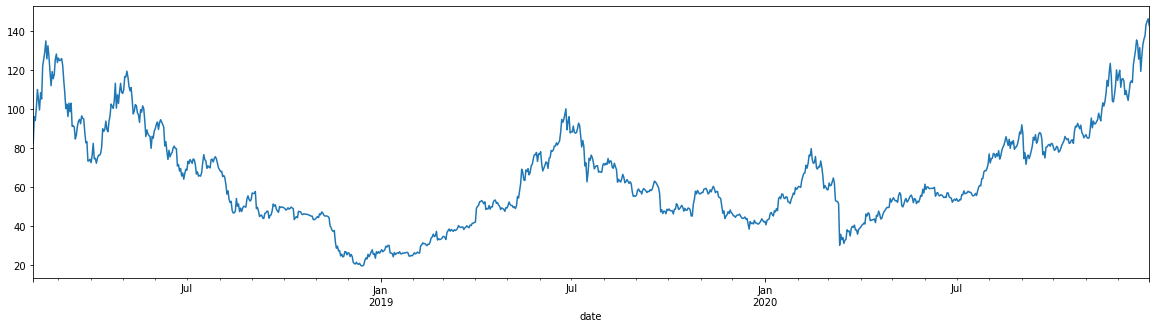

In [ ]:
df_ew_train['capital_f_USDT'].plot(figsize=(20,5))

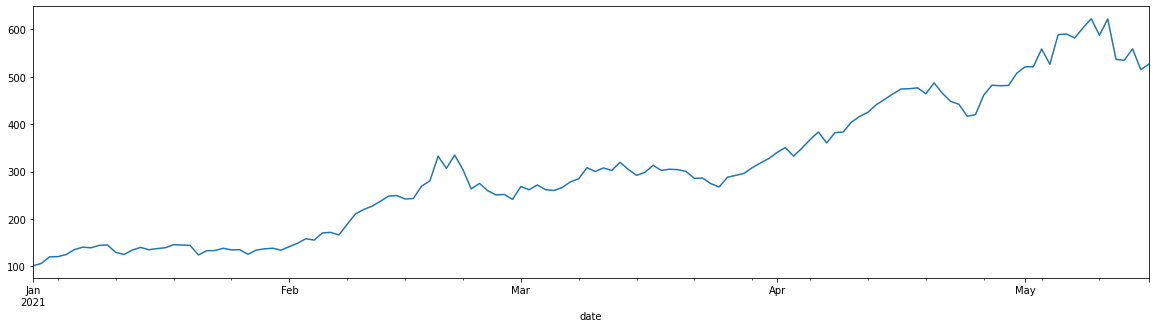

In [ ]:
df_ew_test['capital_f_USDT'].plot(figsize=(20,5))

####**Portafolio: En función de la predicción**

Armamos el dataframe de predicciones con las columnas a considerar. Incluimos las columnas que nos informan sobre volatilidad, liquidez y rendimiento medio, por que nos serán de utilidad paar una segunda estrategia a probar.


In [ ]:
df_pred=df_clasf.reset_index().pivot(index='date', columns='cripto_activo', values=['r_log_target', 'v_m7','vol_7','r_log_m7']) #Dataframe con predicciones

In [ ]:
df_pred

r_log_target                      ...  r_log_m7                    
cripto_activo      BNBUSDT   BTCUSDT   ETHUSDT  ...   ETHUSDT   LTCUSDT   NEOUSDT
date                                            ...                              
2018-02-05       -0.215595 -0.164980 -0.165532  ... -0.020265 -0.018216 -0.018632
2018-02-06        0.204990  0.097685  0.110227  ... -0.059833 -0.041548 -0.052078
2018-02-07       -0.024291 -0.006969 -0.032940  ... -0.074661 -0.053083 -0.102472
2018-02-08        0.052074  0.063252  0.069884  ... -0.047352 -0.025208 -0.049282
2018-02-09        0.147901  0.070206  0.080398  ... -0.057140 -0.026512 -0.051239
...                    ...       ...       ...  ...       ...       ...       ...
2021-05-12       -0.122151 -0.132623 -0.087653  ...  0.019973  0.028069 -0.002834
2021-05-13       -0.040409  0.000799 -0.027929  ...  0.036211  0.030396  0.026000
2021-05-14        0.053706  0.003426  0.091712  ...  0.011631 -0.019597 -0.028226
2021-05-15       -0.067263 -0.063755 -0.111056  ...  0.009048 -0.015613 -0.034149
2021-05-16        0.025774  0.026395  0.008911  ...  0.022568 -0.007946 -0.022157

[1197 rows x 20 columns]

##### **Ranking Volatilidad, Rendimiento Medio y Liquidez**

Definimos una función para armar un ranking de las monedas desde el punto de vista del parámetro elegido según el perfio del inversor a utilizar.

In [ ]:
def ranking(valores):
  monedas=valores.columns
  return list(monedas[np.array(np.argsort(valores))])

Agregamos las columnas con la clasificación a cada sesión.


In [ ]:
df_pred['orden_volatilidad']=ranking(df_pred['vol_7'])
df_pred['orden_liquidez']=ranking(df_pred['v_m7'])
df_pred['orden_rendimiento']=ranking(df_pred['r_log_m7'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_pred[:3]

r_log_target  ...                              orden_rendimiento
cripto_activo      BNBUSDT  ...                                               
date                        ...                                               
2018-02-05       -0.215595  ...  [BNBUSDT, BTCUSDT, ETHUSDT, NEOUSDT, LTCUSDT]
2018-02-06        0.204990  ...  [BNBUSDT, ETHUSDT, BTCUSDT, NEOUSDT, LTCUSDT]
2018-02-07       -0.024291  ...  [NEOUSDT, BNBUSDT, ETHUSDT, BTCUSDT, LTCUSDT]

[3 rows x 23 columns]

##### **División datos en Train y Test**

In [ ]:
df_p_train=df_pred[filtro_train_validation]


In [ ]:
df_p_train=pd.concat([df_p_train,df_pred_train],axis=1)
df_p_train[:3]

,"(r_log_target, BNBUSDT)","(r_log_target, BTCUSDT)","(r_log_target, ETHUSDT)","(r_log_target, LTCUSDT)","(r_log_target, NEOUSDT)","(v_m7, BNBUSDT)","(v_m7, BTCUSDT)","(v_m7, ETHUSDT)","(v_m7, LTCUSDT)","(v_m7, NEOUSDT)","(vol_7, BNBUSDT)","(vol_7, BTCUSDT)","(vol_7, ETHUSDT)","(vol_7, LTCUSDT)","(vol_7, NEOUSDT)","(r_log_m7, BNBUSDT)","(r_log_m7, BTCUSDT)","(r_log_m7, ETHUSDT)","(r_log_m7, LTCUSDT)","(r_log_m7, NEOUSDT)","(orden_volatilidad, )","(orden_liquidez, )","(orden_rendimiento, )",BNBUSDT,BTCUSDT,ETHUSDT,LTCUSDT,NEOUSDT
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-05,-0.215595,-0.164980,-0.165532,-0.161372,-0.264686,1.954940e+06,28859.486823,184022.541729,109009.458789,404506.615000,0.075607,0.058592,0.086353,0.116911,0.096666,-0.045784,-0.031766,-0.020265,-0.018216,-0.018632,"[BTCUSDT, BNBUSDT, ETHUSDT, NEOUSDT, LTCUSDT]","[BTCUSDT, LTCUSDT, ETHUSDT, NEOUSDT, BNBUSDT]","[BNBUSDT, BTCUSDT, ETHUSDT, NEOUSDT, LTCUSDT]",1.0,-1.0,1.0,-1.0,1.0
2018-02-06,0.204990,0.097685,0.110227,0.119087,0.231524,2.279204e+06,35892.620672,221195.986710,146590.912630,502537.058857,0.077079,0.058301,0.078604,0.110804,0.096519,-0.071483,-0.053225,-0.059833,-0.041548,-0.052078,"[BTCUSDT, BNBUSDT, ETHUSDT, NEOUSDT, LTCUSDT]","[BTCUSDT, LTCUSDT, ETHUSDT, NEOUSDT, BNBUSDT]","[BNBUSDT, ETHUSDT, BTCUSDT, NEOUSDT, LTCUSDT]",1.0,1.0,1.0,1.0,1.0
2018-02-07,-0.024291,-0.006969,-0.032940,-0.027247,-0.011629,2.970112e+06,46556.496009,291719.681904,194663.665119,675291.690571,0.094407,0.072036,0.088224,0.119418,0.103020,-0.091974,-0.069022,-0.074661,-0.053083,-0.102472,"[BTCUSDT, ETHUSDT, BNBUSDT, NEOUSDT, LTCUSDT]","[BTCUSDT, LTCUSDT, ETHUSDT, NEOUSDT, BNBUSDT]","[NEOUSDT, BNBUSDT, ETHUSDT, BTCUSDT, LTCUSDT]",-1.0,-1.0,-1.0,-1.0,-1.0


##### **Primer Estrategia**

En función de la predicción tenemos 

*   Menor a -R (Valor a usar => -1)
*   Entre -R y R (Valor a usar => 0)
*   Mayor R (Valor a usar => 1)

De las **n** modenas vamos a tener **T** monedas cuya prediccion va a ser 1, **K** monedas cuya prediccion sera 0 y **S** monedas cuya predicíon será -1.
En función de eso la decisión sería: 
* Si T>0, entonces el capital lo dividimos en esas monedas con predicciones positivas, y nada de capital para las otras.
* Si T=0 pero K>0, entonces, dejamos el mismo capital que tenian las K monedas y nos retiramos del resto.
* Si T=0 y K=0, entonces nos retiramos de todas las monedas.

El capital de cada iteración se divide en PARTES IGUALES entre las monedas consideradas en la iteación deacuerdo a las reglas de decisión anteriores.

El rebalanceo sería similar al otro pero con un recorrido entre las monedas dentro de la iteración de filas




###### **Con datos de Entrenamiento**

In [ ]:
col=[('r_log_target','BNBUSDT'),('r_log_target','BTCUSDT'),('r_log_target','ETHUSDT'),('r_log_target','LTCUSDT'),('r_log_target','NEOUSDT'),
     
     ('v_m7','BNBUSDT'),('v_m7','BTCUSDT'),('v_m7','ETHUSDT'),('v_m7','LTCUSDT'),('v_m7','NEOUSDT'),
     ('vol_7','BNBUSDT'),('vol_7','BTCUSDT'),('vol_7','ETHUSDT'),('vol_7','LTCUSDT'),('vol_7','NEOUSDT'),
     ('r_log_m7','BNBUSDT'),('r_log_m7','BTCUSDT'),('r_log_m7','ETHUSDT'),('r_log_m7','LTCUSDT'),('r_log_m7','NEOUSDT'),
     ('orden', 'orden_volatilidad'),
     ('orden','orden_liquidez' ),
     ('orden','orden_rendimiento'),
     ('r_log_clasif','BNBUSDT'),('r_log_clasif','BTCUSDT'),('r_log_clasif','ETHUSDT'),('r_log_clasif','LTCUSDT'),('r_log_clasif','NEOUSDT'),
     ]

df_p_train.columns=pd.MultiIndex.from_tuples(col)
df_p_train.head()

r_log_target                      ... r_log_clasif                
                BNBUSDT   BTCUSDT   ETHUSDT  ...      ETHUSDT LTCUSDT NEOUSDT
date                                         ...                             
2018-02-05    -0.215595 -0.164980 -0.165532  ...          1.0    -1.0     1.0
2018-02-06     0.204990  0.097685  0.110227  ...          1.0     1.0     1.0
2018-02-07    -0.024291 -0.006969 -0.032940  ...         -1.0    -1.0    -1.0
2018-02-08     0.052074  0.063252  0.069884  ...         -1.0     1.0    -1.0
2018-02-09     0.147901  0.070206  0.080398  ...         -1.0     1.0    -1.0

[5 rows x 28 columns]

In [ ]:
p_rebalanceo=1
capital_0=100
capital_f=100
n=len(coins)
inicio=df_p_train.index[0]
df_p_train[('Capital','Capital_i_USDT_1_estrategia')]=0
df_p_train[('Capital','Capital_f_USDT_1_estrategia')]=0
capital_monedas=[0]*len(coins)
for index, row in df_p_train.iterrows():
  df_p_train.loc[index,[('Capital','Capital_i_USDT_1_estrategia')]]=round(capital_0,2)
  t=(row['r_log_clasif']==1).sum()
  k=(row['r_log_clasif']==0).sum()
  s=(row['r_log_clasif']==-1).sum()
  if t==5:
    capital_i_c=capital_0/t
    ercomp=np.exp(row['r_log_target'].astype(float) ).sum()
    capital_f=capital_i_c*ercomp
    capital_monedas=np.exp(row['r_log_target'].astype(float) )*capital_i_c
  elif t>0:
    capital_i_c=capital_0/t

    ercomp=np.exp((row['r_log_target'][(row['r_log_clasif']==1)]).astype(float)).sum()
    capital_f=capital_i_c*ercomp
    capital_0=capital_f
    capital_monedas=np.multiply(row['r_log_target'],(row['r_log_target']==1))*capital_i_c

  elif k>0:
    #falta codigo
    
    capital_monedas=np.multiply(capital_monedas,(row['r_log_clasif']==0))
    delta=capital_f-capital_monedas.sum()
    capital_monedas=np.multiply(capital_monedas,np.exp(row['r_log_target'].astype(float)))
    capital_f=delta+capital_monedas.sum()
    capital_0=capital_f
  else:
    capital_monedas=np.multiply(capital_monedas,(row['r_log_clasif']==1))
    capital_f=capital_0
  
  df_p_train.loc[index,[('Capital','Capital_f_USDT_1_estrategia')]]=round(capital_f,2)

  capital_0=capital_f

  #last_row=row
  #last_index=index

df_p_train.head()

r_log_target  ...                     Capital
                BNBUSDT  ... Capital_f_USDT_1_estrategia
date                     ...                            
2018-02-05    -0.215595  ...                       80.70
2018-02-06     0.204990  ...                       94.15
2018-02-07    -0.024291  ...                       94.15
2018-02-08     0.052074  ...                       99.80
2018-02-09     0.147901  ...                      111.69

[5 rows x 30 columns]

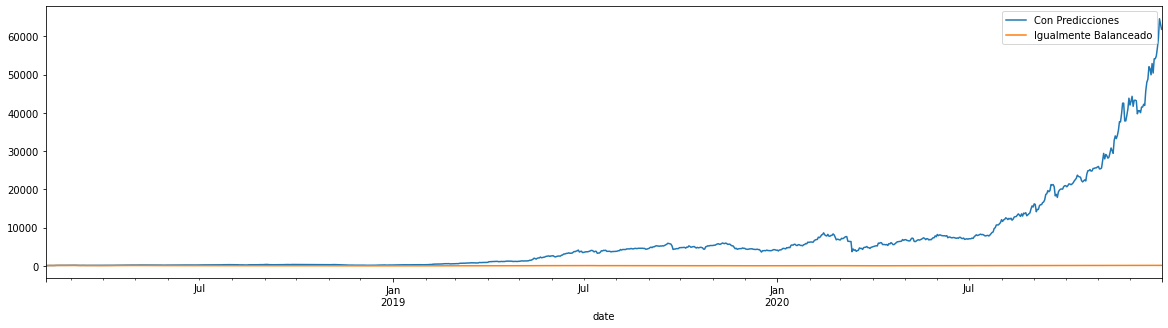

In [ ]:
df_p_train[('Capital','Capital_f_USDT_1_estrategia')].plot(figsize=(20,5),label='Con Predicciones')
df_ew_train['capital_f_USDT'].plot(figsize=(20,5),label='Igualmente Balanceado')
plt.legend()

###### **Con datos de Test**

In [ ]:
df_p_test=df_pred[filtro_test]

In [ ]:
df_p_test=pd.concat([df_p_test,df_pred_test],axis=1)

In [ ]:
col=[('r_log_target','BNBUSDT'),('r_log_target','BTCUSDT'),('r_log_target','ETHUSDT'),('r_log_target','LTCUSDT'),('r_log_target','NEOUSDT'),
     
     ('v_m7','BNBUSDT'),('v_m7','BTCUSDT'),('v_m7','ETHUSDT'),('v_m7','LTCUSDT'),('v_m7','NEOUSDT'),
     ('vol_7','BNBUSDT'),('vol_7','BTCUSDT'),('vol_7','ETHUSDT'),('vol_7','LTCUSDT'),('vol_7','NEOUSDT'),
     ('r_log_m7','BNBUSDT'),('r_log_m7','BTCUSDT'),('r_log_m7','ETHUSDT'),('r_log_m7','LTCUSDT'),('r_log_m7','NEOUSDT'),
     ('orden', 'orden_volatilidad'),
     ('orden','orden_liquidez' ),
     ('orden','orden_rendimiento'),
     ('r_log_clasif','BNBUSDT'),('r_log_clasif','BTCUSDT'),('r_log_clasif','ETHUSDT'),('r_log_clasif','LTCUSDT'),('r_log_clasif','NEOUSDT'),
     ]

df_p_test.columns=pd.MultiIndex.from_tuples(col)
df_p_test.head()

r_log_target                      ... r_log_clasif                
                BNBUSDT   BTCUSDT   ETHUSDT  ...      ETHUSDT LTCUSDT NEOUSDT
date                                         ...                             
2021-01-01     0.011111  0.014010 -0.010250  ...         -1.0    -1.0    -1.0
2021-01-02     0.012022  0.092625  0.060745  ...         -1.0    -1.0    -1.0
2021-01-03     0.076131  0.025216  0.233501  ...         -1.0    -1.0    -1.0
2021-01-04    -0.003015 -0.031126  0.062554  ...         -1.0    -1.0    -1.0
2021-01-05     0.016602  0.059492  0.054315  ...         -1.0    -1.0    -1.0

[5 rows x 28 columns]

In [ ]:
capital_0=100
capital_f=100
n=len(coins)
inicio=df_p_test.index[0]
df_p_test[('Capital','Capital_i_USDT_1_estrategia')]=0
df_p_test[('Capital','Capital_f_USDT_1_estrategia')]=0
capital_monedas=[0]*len(coins)
for index, row in df_p_test.iterrows():
  df_p_test.loc[index,[('Capital','Capital_i_USDT_1_estrategia')]]=round(capital_0,2)
  t=(row['r_log_clasif']==1).sum()
  k=(row['r_log_clasif']==0).sum()
  s=(row['r_log_clasif']==-1).sum()
  if t==5:
    capital_i_c=capital_0/t
    ercomp=np.exp(row['r_log_target'].astype(float) ).sum()
    capital_f=capital_i_c*ercomp
    capital_monedas=np.exp(row['r_log_target'].astype(float) )*capital_i_c
  elif t>0:
    capital_i_c=capital_0/t

    ercomp=np.exp(row['r_log_target'][(row['r_log_clasif']==1)].astype(float) ).sum()
    capital_f=capital_i_c*ercomp
    capital_0=capital_f
    capital_monedas=np.multiply(row['r_log_target'],(row['r_log_target']==1))*capital_i_c

  elif k>0:
    #falta codigo
    
    capital_monedas=np.multiply(capital_monedas,(row['r_log_clasif']==0))
    delta=capital_f-capital_monedas.sum()
    capital_monedas=np.multiply(capital_monedas,np.exp(row['r_log_target'].astype(float)))
    capital_f=delta+capital_monedas.sum()
    capital_0=capital_f
  else:
    capital_monedas=np.multiply(capital_monedas,(row['r_log_clasif']==1))
    capital_f=capital_0
  
  df_p_test.loc[index,[('Capital','Capital_f_USDT_1_estrategia')]]=round(capital_f,2)

  capital_0=capital_f

  #last_row=row
  #last_index=index

df_p_test.head()

r_log_target  ...                     Capital
                BNBUSDT  ... Capital_f_USDT_1_estrategia
date                     ...                            
2021-01-01     0.011111  ...                      100.00
2021-01-02     0.012022  ...                      109.70
2021-01-03     0.076131  ...                      118.38
2021-01-04    -0.003015  ...                      116.39
2021-01-05     0.016602  ...                      120.93

[5 rows x 30 columns]

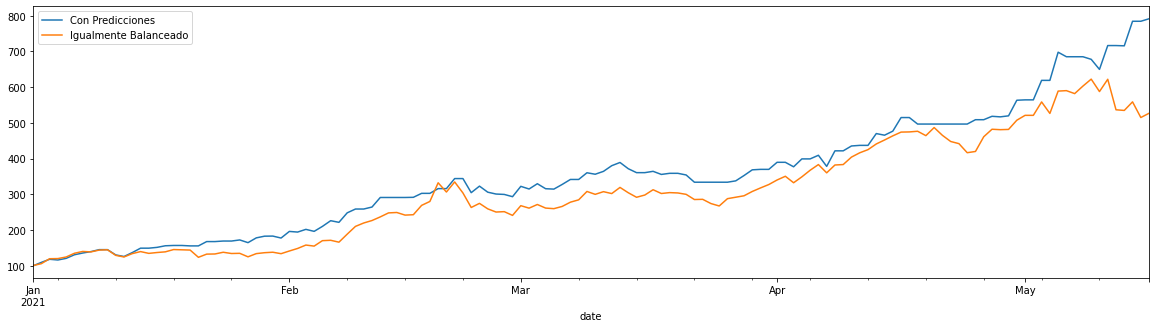

In [ ]:
df_p_test[('Capital','Capital_f_USDT_1_estrategia')].plot(figsize=(20,5),label='Con Predicciones')
df_ew_test['capital_f_USDT'].plot(figsize=(20,5),label='Igualmente Balanceado')
plt.legend()

##### **Segunda Estrategia**

Definimos los siguientes criterios a seguir según la clasificacion de los activos:

1) TODAS las monedas reciben la MISMA clasificación. En este caso tenemos los siguientes escenarios posibles:

- 1.1) Todas fueron clasificadas con "1": dividimos el capital actual entre las n monedas en funcion de un ranking determinado por uno de los siguientes criterios selecionado segun el inversor: volatilidad, rendimiento medio o liquidez. El porcentaje de l capital a invertir en cada posicion del ranking va a ser determinado por el perfil del inversor.

- 1.2) Todas fueron clasificadas con "0": dividimos el capital actual entre las n monedas en funcion de un ranking determinado por uno de los siguientes criterios selecionado segun el inversor: volatilidad, rendimiento medio o liquidez. El porcentaje de l capital a invertir en cada posicion del ranking va a ser determinado por el perfil del inversor.

- 1.3) Todas fueron clasificadas con "-1": en este caso retiramos el total de la inversión.

2) Las monedas reciben DISTINTA clasificación. En este caso tenemos los siguientes escenarios posibles:

- 2.1) Existe al menos una moneda con clasificación POSITIVA. Este escenario tiene a su vez tres posibles sub-escenarios.

- 2.1.A) Entre el resto de las monedas tenemos al menos una clasificada con "0" y al menos una clasificada con "-1".

- 2.1.B) El resto de las monedas fueron clasificadas con "0".

- 2.1.C) El resto de las monedas fueron clasificadas con "-1".


En esta situación vamos a establecer:
=> Un porcentaje X del capital que será invertido entre las monedas POSITIVAS. 
=> Un porcentaje Y del capital que será invertido entre las monedas restantes, siguiendo ciertas reglas:


  - En el sub-escenario A, el porcentaje Y será invertido entre las monedas sin variación ("0" o NEUTRAS) teniendo en cuanta la volatilidad y la liquidez de las mismas. Las monedas NEGATIVAS no serán consideradas.

  - En el sub-escenario B, el porcentaje Y será invertido porporcionalmente entre las monedas sin variación ("0" NEUTRAS) teniendo en cuanta la volatilidad y la liquidez de las mismas.

  - En el sub-escenario C, el porcentaje Y será CERO, ya que las monedas NEGATIVAS no serán consideradas. todo el capital se invertira entre las positivas.

2.2) No existe NINGUNA moneda clasificada como POSITIVA. 
En este caso, sabiendo que hay monedas con distinta clasificación, podemos decir que tenemos al menos una moneda clasificada con "0" y al menos una moneda clasificada con "-1". En este escenario el 100% del capital será invertido en las monedas NEUTRAS, ignorando las NEGATIVAs.-

El porcentaje X se definira segun el perfil del inversor.





###### **Con Datos de Entrenamiento**

###### Implementación

In [ ]:
#Conservador
porcentaje=[[0.3,0.2,0.2,0.2,0.1],[0.4,0.25,0.25,0.1,0],[0.5,0.3,0.2,0,0],[0.6,0.4,0,0,0],[1,0,0,0,0]]

porcentaje_PZ=[0.8,0.2,0]
porcentaje_PN=[1,0,0]

porcentaje_ZN=[0,1,0]

In [ ]:
df_p_train.head()

r_log_target  ...                     Capital
                BNBUSDT  ... Capital_f_USDT_1_estrategia
date                     ...                            
2018-02-05    -0.215595  ...                       80.70
2018-02-06     0.204990  ...                       94.15
2018-02-07    -0.024291  ...                       94.15
2018-02-08     0.052074  ...                       99.80
2018-02-09     0.147901  ...                      111.69

[5 rows x 30 columns]

In [ ]:
np.multiply(np.exp(row['r_log_target'][row['orden','orden_volatilidad']].astype(float)),porcentaje[0]).sum()


1.0221354980278996

In [ ]:
(np.exp(row['r_log_target'][row['orden','orden_volatilidad'][0]])*porcentaje[0][0]+\
                         np.exp(row['r_log_target'][row['orden','orden_volatilidad'][1]])*porcentaje[0][1]+\
                         np.exp(row['r_log_target'][row['orden','orden_volatilidad'][2]])*porcentaje[0][2]+\
                         np.exp(row['r_log_target'][row['orden','orden_volatilidad'][3]])*porcentaje[0][3]+\
                         np.exp(row['r_log_target'][row['orden','orden_volatilidad'][4]])*porcentaje[0][4])

1.0221354980278996

In [ ]:
capital_i=100
capital_f=100

n=len(coins)

inicio=df_pred.index[0]
df_p_train[('Capital','Capital_i_USDT_2_estrategia')]=0
df_p_train[('Capital','Capital_f_USDT_2_estrategia')]=0


for index, row in df_p_train.iterrows():
  ercomp_P=0
  ercomp_Z=0
  ercomp_N=0

  df_p_train.loc[index,[('Capital','Capital_i_USDT_2_estrategia')]]=round(capital_i,5)

  t=(row['r_log_clasif']==1).sum()
  k=(row['r_log_clasif']==0).sum()
  s=(row['r_log_clasif']==-1).sum()
  #print('t: ',t,' - k: ',k,' - s: ',s)

  
  if t==n or k==n:
    #print(row['r_log_target'][row['orden_volatilidad'][0]])

    ## Todas las monedas se clasificaron POSITIVAS (1) o Todas se clasificaron NEUTRAS (0)
    capital_f=capital_i*(np.multiply(np.exp(row['r_log_target'][row['orden','orden_volatilidad']].astype(float)),porcentaje[0]).sum())
    
                        #(np.exp(row['r_log_target'][row['orden','orden_volatilidad'][0]])*porcentaje[0][0]+\
                         #np.exp(row['r_log_target'][row['orden','orden_volatilidad'][1]])*porcentaje[0][1]+\
                         #np.exp(row['r_log_target'][row['orden','orden_volatilidad'][2]])*porcentaje[0][2]+\
                         #np.exp(row['r_log_target'][row['orden','orden_volatilidad'][3]])*porcentaje[0][3]+\
                         #np.exp(row['r_log_target'][row['orden','orden_volatilidad'][4]])*porcentaje[0][4])
  elif s==n:
    ## Todas las monedas se clasificaron  NEGATIVAS (-1)
    capital_f=capital_i

  elif t>0:
    ## Al menos una moneda se clasificó POSITIVA (1)

    if k>0:
    ##Las monedas restantes incluyen al menos una NEUTRA (0)
      cap_P=capital_i*porcentaje_PZ[0]
      cap_Z=capital_i*porcentaje_PZ[1]
      cap_N=capital_i*porcentaje_PZ[2]## ya sabemos que dará CERO
      contador_Z=0
      contador_P=0
      for i in range(n):
        if row['r_log_clasif'][row['orden','orden_volatilidad'][i]]>0:
            ##calculamos rendimiento real compuesto de POSITIVAS
            ercomp_P+=np.exp(row['r_log_target'][row['orden','orden_volatilidad'][i]])*porcentaje[-t][contador_P]
            contador_P+=1
        elif row['r_log_clasif'][row['orden','orden_volatilidad'][i]]==0:
            ##calculamos rendimiento compuesto de NEUTRAS
            ercomp_Z+=np.exp(row['r_log_target'][row['orden','orden_volatilidad'][i]])*porcentaje[-k][contador_Z]
            contador_Z+=1          
        else:
          ##Se ignoran lasNEGATIVAS
          ercomp_N=0

      ##El capital final sera la suma del capital invertido en POSITIVAS y NEUTRAS     
      capital_f=cap_P*ercomp_P+cap_Z*ercomp_Z+cap_N*ercomp_N

    else:
    ## Las monedas restantes son todas NEGATIVAS (-1)
      contador_P=0
      for l in range(n):
        cap_P=capital_i*porcentaje_PN[0] ##sabemos que es el 100%
        if row['r_log_clasif'][row['orden','orden_volatilidad'][l]]>0:
          ercomp_P+=np.exp(row['r_log_target'][row['orden','orden_volatilidad'][l]])*porcentaje[-t][contador_P]
          contador_P+=1

      ##El capital final sera la suma del capital invertido solo en POSITIVAS  
      capital_f=cap_P*ercomp_P
  else:
    ## NINGUNA MONEDA se clasifico positiva, pero si hay NEUTRAS y NEGATIVAS.
    contador_Z=0
    for m in range(n):
      cap_Z=capital_i*porcentaje_ZN[1] ##sabemos que es el 100%

      if row['r_log_clasif'][row['orden','orden_volatilidad'][m]]==0:
        ercomp_Z+=np.exp(row['r_log_target'][row['orden','orden_volatilidad'][m]])*porcentaje[-k][contador_Z]
        contador_Z+=1 

    ##El capital final sera la suma del capital invertido solo en NEUTRAS 
    capital_f=cap_Z*ercomp_Z

  df_p_train.loc[index,[('Capital','Capital_f_USDT_2_estrategia')]]=round(capital_f,5)
  capital_i=capital_f

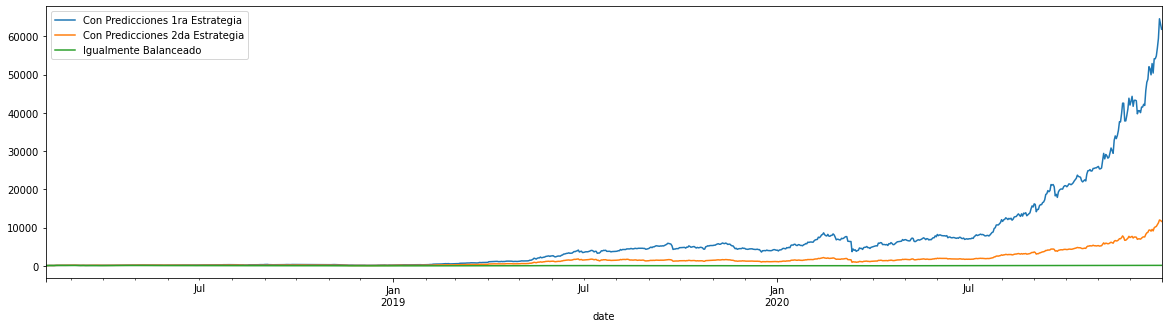

In [ ]:
df_p_train[('Capital','Capital_f_USDT_1_estrategia')].plot(figsize=(20,5),label='Con Predicciones 1ra Estrategia')
df_p_train[('Capital','Capital_f_USDT_2_estrategia')].plot(figsize=(20,5),label='Con Predicciones 2da Estrategia')
df_ew_train['capital_f_USDT'].plot(figsize=(20,5),label='Igualmente Balanceado')
plt.legend()

Se ve que con los datos de entrenamiento las dos estrategias superan a la estrategia igualmente balanceada.

###### **Con Datos de Test**

In [ ]:
df_p_test.head()

r_log_target  ...                     Capital
                BNBUSDT  ... Capital_f_USDT_1_estrategia
date                     ...                            
2021-01-01     0.011111  ...                      100.00
2021-01-02     0.012022  ...                      109.70
2021-01-03     0.076131  ...                      118.38
2021-01-04    -0.003015  ...                      116.39
2021-01-05     0.016602  ...                      120.93

[5 rows x 30 columns]

In [ ]:
capital_i=100
capital_f=100
orden='orden_volatilidad'
n=len(coins)

inicio=df_pred.index[0]
df_p_test[('Capital','Capital_i_USDT_2_estrategia')]=0
df_p_test[('Capital','Capital_f_USDT_2_estrategia')]=0


for index, row in df_p_test.iterrows():
  ercomp_P=0
  ercomp_Z=0
  ercomp_N=0

  df_p_test.loc[index,[('Capital','Capital_i_USDT_2_estrategia')]]=round(capital_i,5)

  t=(row['r_log_clasif']==1).sum()
  k=(row['r_log_clasif']==0).sum()
  s=(row['r_log_clasif']==-1).sum()
  #print('t: ',t,' - k: ',k,' - s: ',s)

  
  if t==n or k==n:
    #print(row['r_log_target'][row['orden_volatilidad'][0]])

    ## Todas las monedas se clasificaron POSITIVAS (1) o Todas se clasificaron NEUTRAS (0)
    capital_f=capital_i*(np.multiply(np.exp(row['r_log_target'][row['orden',orden]].astype(float)),porcentaje[0]).sum())
    
                        #(np.exp(row['r_log_target'][row['orden','orden_volatilidad'][0]])*porcentaje[0][0]+\
                         #np.exp(row['r_log_target'][row['orden','orden_volatilidad'][1]])*porcentaje[0][1]+\
                         #np.exp(row['r_log_target'][row['orden','orden_volatilidad'][2]])*porcentaje[0][2]+\
                         #np.exp(row['r_log_target'][row['orden','orden_volatilidad'][3]])*porcentaje[0][3]+\
                         #np.exp(row['r_log_target'][row['orden','orden_volatilidad'][4]])*porcentaje[0][4])
  elif s==n:
    ## Todas las monedas se clasificaron  NEGATIVAS (-1)
    capital_f=capital_i

  elif t>0:
    ## Al menos una moneda se clasificó POSITIVA (1)

    if k>0:
    ##Las monedas restantes incluyen al menos una NEUTRA (0)
      cap_P=capital_i*porcentaje_PZ[0]
      cap_Z=capital_i*porcentaje_PZ[1]
      cap_N=capital_i*porcentaje_PZ[2]## ya sabemos que dará CERO
      contador_Z=0
      contador_P=0
      for i in range(n):
        if row['r_log_clasif'][row['orden','orden_volatilidad'][i]]>0:
            ##calculamos rendimiento real compuesto de POSITIVAS
            ercomp_P+=np.exp(row['r_log_target'][row['orden',orden][i]])*porcentaje[-t][contador_P]
            contador_P+=1
        elif row['r_log_clasif'][row['orden','orden_volatilidad'][i]]==0:
            ##calculamos rendimiento compuesto de NEUTRAS
            ercomp_Z+=np.exp(row['r_log_target'][row['orden',orden][i]])*porcentaje[-k][contador_Z]
            contador_Z+=1          
        else:
          ##Se ignoran lasNEGATIVAS
          ercomp_N=0

      ##El capital final sera la suma del capital invertido en POSITIVAS y NEUTRAS     
      capital_f=cap_P*ercomp_P+cap_Z*ercomp_Z+cap_N*ercomp_N

    else:
    ## Las monedas restantes son todas NEGATIVAS (-1)
      contador_P=0
      for l in range(n):
        cap_P=capital_i*porcentaje_PN[0] ##sabemos que es el 100%
        if row['r_log_clasif'][row['orden',orden][l]]>0:
          ercomp_P+=np.exp(row['r_log_target'][row['orden',orden][l]])*porcentaje[-t][contador_P]
          contador_P+=1

      ##El capital final sera la suma del capital invertido solo en POSITIVAS  
      capital_f=cap_P*ercomp_P
  else:
    ## NINGUNA MONEDA se clasifico positiva, pero si hay NEUTRAS y NEGATIVAS.
    contador_Z=0
    for m in range(n):
      cap_Z=capital_i*porcentaje_ZN[1] ##sabemos que es el 100%

      if row['r_log_clasif'][row['orden',orden][m]]==0:
        ercomp_Z+=np.exp(row['r_log_target'][row['orden',orden][m]])*porcentaje[-k][contador_Z]
        contador_Z+=1 

    ##El capital final sera la suma del capital invertido solo en NEUTRAS 
    capital_f=cap_Z*ercomp_Z

  df_p_test.loc[index,[('Capital','Capital_f_USDT_2_estrategia')]]=round(capital_f,5)
  capital_i=capital_f

In [ ]:
df_p_test[('Capital','Capital_f_USDT_2_estrategia')]

date
2021-01-01    101.41082
2021-01-02    111.25274
2021-01-03    120.05330
2021-01-04    117.70120
2021-01-05    122.81822
                ...    
2021-05-12    461.92266
2021-05-13    455.91975
2021-05-14    499.71019
2021-05-15    468.84557
2021-05-16    473.04202
Name: (Capital, Capital_f_USDT_2_estrategia), Length: 136, dtype: float64

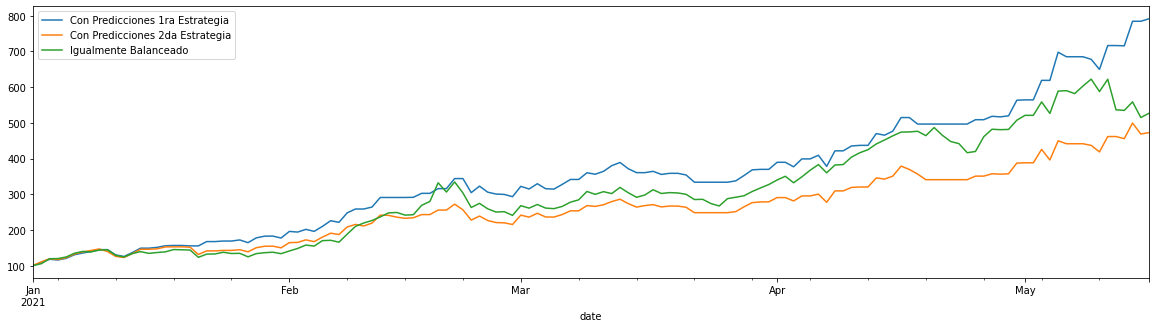

In [ ]:
df_p_test[('Capital','Capital_f_USDT_1_estrategia')].plot(figsize=(20,5),label='Con Predicciones 1ra Estrategia')
df_p_test[('Capital','Capital_f_USDT_2_estrategia')].plot(figsize=(20,5),label='Con Predicciones 2da Estrategia')
df_ew_test['capital_f_USDT'].plot(figsize=(20,5),label='Igualmente Balanceado')
plt.legend()

#PARTE II

##**Comparacíon de estrategias**

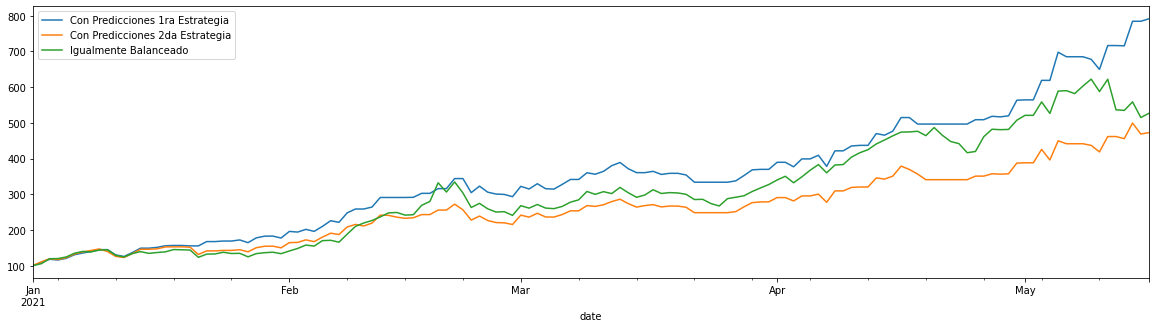

In [ ]:
df_p_test[('Capital','Capital_f_USDT_1_estrategia')].plot(figsize=(20,5),label='Con Predicciones 1ra Estrategia')
df_p_test[('Capital','Capital_f_USDT_2_estrategia')].plot(figsize=(20,5),label='Con Predicciones 2da Estrategia')
df_ew_test['capital_f_USDT'].plot(figsize=(20,5),label='Igualmente Balanceado')
plt.legend()

Se observa que luego del periodo de test la 1 er estrategia de balanceo con las predicciones es la que mayores ganancias otorgo, superando a la estrategia de balancear los pesos en partes iguales.

Se obserba que en puntos donde la curva de balanceo igualmente pesado ha tenido caidas, las estrategias basadas en predicciones las evitaron o no fueron tan grandes, manteniendo un crecimiento más sostenido.

Todas las estrategias aumentaron el capital inicial, multiplicandolo al menos 4 veces

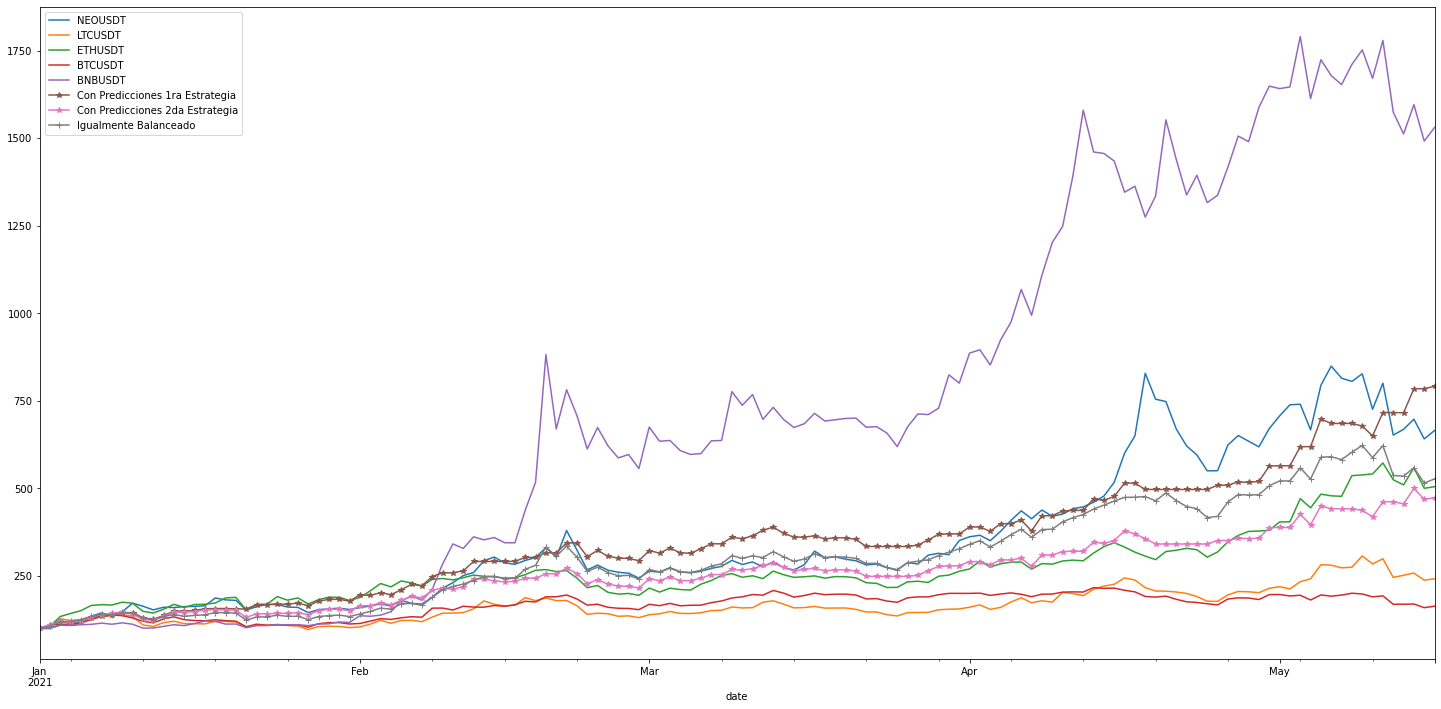

In [163]:
for coin in coins:
  (df_temp.loc[coin,'close'][filtro_test]/df_temp.loc[coin,'close'][filtro_test].iloc[0]*100).plot(figsize=(20,10),label=coin)
df_p_test[('Capital','Capital_f_USDT_1_estrategia')].plot(figsize=(20,10),label='Con Predicciones 1ra Estrategia',marker='*')
df_p_test[('Capital','Capital_f_USDT_2_estrategia')].plot(figsize=(20,10),label='Con Predicciones 2da Estrategia',marker='*')
df_ew_test['capital_f_USDT'].plot(figsize=(25,12),label='Igualmente Balanceado',marker='+')
plt.legend()

Comparando con el comportamiento de cada cripto activo, se observa que la estrategia de peso balanceados igualmente tuvo mayores incrementos que 3 de las criptos, la estrategia nº1 con predicciones al final del periodo supera a 4 monedas y la segunda estrategia a dos monedas

### **Evaluacion de portafolios en el periodo de test segun retornos obtenidos**

In [168]:
frecuencia='7D'
df_resample=df_p_test.resample(frecuencia).first()

In [171]:
#Rendimentos semanales

df_resample[('retornos','retornos_1_estrategia')]=np.log(df_resample[('Capital','Capital_f_USDT_1_estrategia')]/df_resample[('Capital','Capital_f_USDT_1_estrategia')].shift(1))
df_resample[('retornos','retornos_2_estrategia')]=np.log(df_resample[('Capital','Capital_f_USDT_2_estrategia')]/df_resample[('Capital','Capital_f_USDT_2_estrategia')].shift(1))
df_resample[('retornos','retornos_igualmente_balanceado')]=np.log(df_ew_test['capital_f_USDT'].resample(frecuencia).first()/df_ew_test['capital_f_USDT'].resample(frecuencia).first().shift(1))

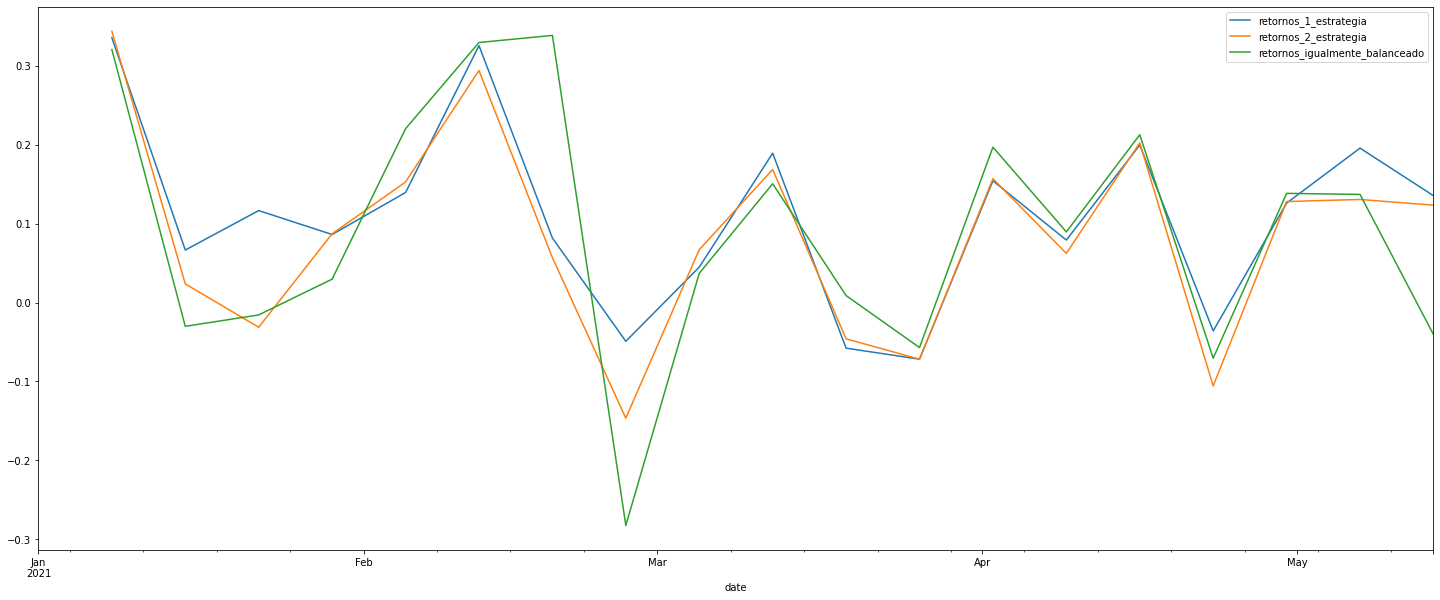

In [173]:
df_resample['retornos'].plot(figsize=(25,10))

In [ ]:
#Rendimientos totales
r1estrategia=np.exp(np.log(df_p_test[('Capital','Capital_f_USDT_1_estrategia')].iloc[-1]/df_p_test[('Capital','Capital_f_USDT_1_estrategia')].iloc[0]))

r2estrategia=np.exp(np.log(df_p_test[('Capital','Capital_f_USDT_2_estrategia')].iloc[-1]/df_p_test[('Capital','Capital_f_USDT_2_estrategia')].iloc[0]))
rigualbalanceo=np.exp(np.log(df_ew_test['capital_f_USDT'].iloc[-1]/df_ew_test['capital_f_USDT'].iloc[0]))

In [ ]:
print(r1estrategia,r2estrategia,rigualbalanceo)

7.915599999999999 4.664610935992826 5.2229312944230895


Observando Retornos se ve que la mejor estrategia es la 1er estrategia con predicciones, la segunda la de balanceo con pesos iguales y por ultimo la 2da estrategia.

### **Evaluacion de portafolios en el periodo de test segun volatilidades obtenidas**

**Observando la volatilidad por semana**

In [174]:
df_p_test[('retornos','1_estrategia')]=np.log(df_p_test[('Capital','Capital_f_USDT_1_estrategia')]/df_p_test[('Capital','Capital_f_USDT_1_estrategia')].shift(1))
df_p_test[('retornos','2_estrategia')]=np.log(df_p_test[('Capital','Capital_f_USDT_2_estrategia')]/df_p_test[('Capital','Capital_f_USDT_2_estrategia')].shift(1))
df_p_test[('retornos','igualmente_balanceado')]=np.log(df_ew_test['capital_f_USDT']/df_ew_test['capital_f_USDT'].shift(1))

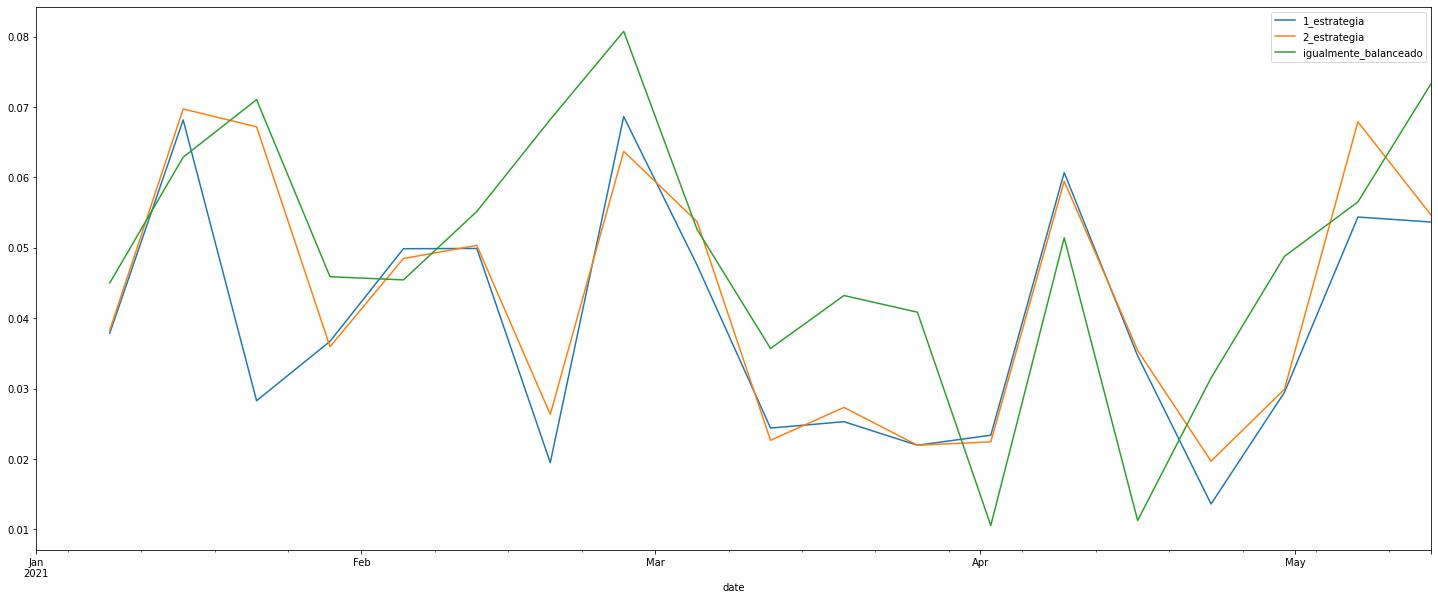

In [176]:
df_p_test['retornos'].rolling(7).std().resample(frecuencia).first().plot(figsize=(25,10))

**volatilidad total del periodo de test**

In [ ]:
df_p_test['retornos'].std()

1_estrategia             0.042495
2_estrategia             0.046644
igualmente_balanceado    0.053706
dtype: float64

Se ve que en todo el periodo de test la 1er estrategia fue la menos volatil, seguido por la segunda estrategia y finalmente la más volatil fue la de balancear los pesos de igual manera

**Volatilidad vs. Rendimiento esperado promedio**

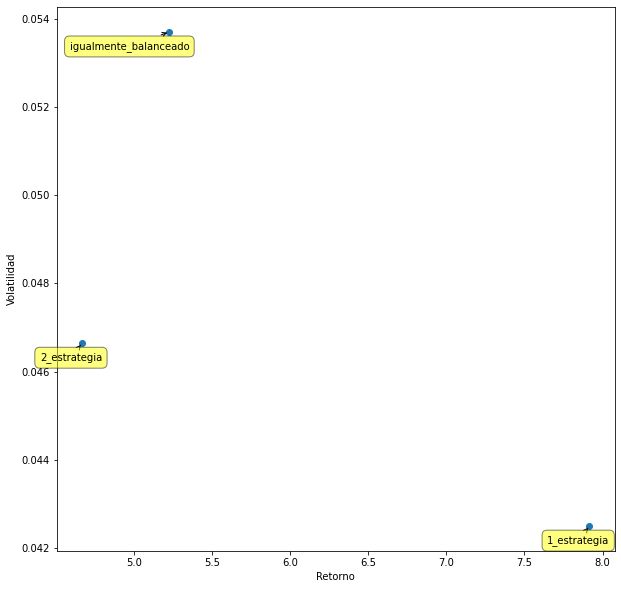

In [181]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.exp(df_p_test['retornos'].sum()), df_p_test['retornos'].std())
plt.xlabel('Retorno')
plt.ylabel('Volatilidad')
for label, x, y in zip(df_p_test['retornos'].columns, np.exp(df_p_test['retornos'].sum()), df_p_test['retornos'].std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


Se observa que la 1er estrategia fue la que tuvo mejores rendimientos esperados y menor volatilidad que las otras dos.

##**Guardado de los modelos**

In [ ]:
f'modelo_entrenado {coin}.pkl'

'modelo_entrenado BNBUSDT.pkl'

In [ ]:
import joblib

for coin in coins:
  joblib.dump(modelos_pipe[cripto].best_estimator_, f'modelo_entrenado_{coin}.pkl') # Guardo el modelo.


In [ ]:
from google.colab import drive
drive.mount('drive')
!cp modelo_entrenado_BTCUSDT.pkl "drive/MyDrive/Diplomatura de Ciencia de Datos/Mentoría Cripto Activos Grupo 2/Modelos entrenados"
!cp modelo_entrenado_ETHUSDT.pkl "drive/MyDrive/Diplomatura de Ciencia de Datos/Mentoría Cripto Activos Grupo 2/Modelos entrenados"
!cp modelo_entrenado_LTCUSDT.pkl "drive/MyDrive/Diplomatura de Ciencia de Datos/Mentoría Cripto Activos Grupo 2/Modelos entrenados"
!cp modelo_entrenado_BNBUSDT.pkl "drive/MyDrive/Diplomatura de Ciencia de Datos/Mentoría Cripto Activos Grupo 2/Modelos entrenados"
!cp modelo_entrenado_NEOUSDT.pkl "drive/MyDrive/Diplomatura de Ciencia de Datos/Mentoría Cripto Activos Grupo 2/Modelos entrenados"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
prueba = joblib.load('drive/MyDrive/Diplomatura de Ciencia de Datos/Mentoría Cripto Activos Grupo 2/Modelos entrenados/modelo_entrenado_BNBUSDT.pkl')
print(classification_report(y_test,prueba.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.38      0.83      0.53        48
         0.0       0.17      0.05      0.07        21
         1.0       0.62      0.24      0.34        67

    accuracy                           0.42       136
   macro avg       0.39      0.37      0.31       136
weighted avg       0.46      0.42      0.37       136

